In [1]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import set_config
from sklearn.inspection import PartialDependenceDisplay, partial_dependence


set_config(display="diagram")

# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Data Problem Definition

- Used car prices are driven by several factor like usage, car condition, clean title, size, year of manufacturing, manufacturer etc. Based on previous sales, deduce the key parameters that affect the car price and understand  customers preferences. 
- Based on this understanding, make recommendations to the car dealer on
  1. How to estimate the price of used cars?
  2. What kind of cars to stock in their inventory?

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Exploratory Data Analysis Approach
- Identify the different features in the dataset
- Identify the key features that impact price
- Univariate and Bivariate Analysis
- Correlation Analysis

### Data Analaysis
- There are 17 features that could potentially determine the price of the used car
- There are 4 columns that have numeric data type: id, price, year of manufacturing and odometer reading
- There is data missing for different features
- There is invalid data like price value of 0, which is not practical
- The features id and VIN, will not influence the cost of the price and will not be included in the model
- Features condition, cylinders, VIN, drive, size, type, paint_color, have more than 30% of the data missing.  

### Freature Selection

1. Id: No; similar to index
2. Region: No; 404 different regions; Consider using state instead
3. Year: Yes
4. Manufacturer: Yes; Some Manufacturers have higher car resale value. Even though there are many, it is worth including it in the model
5. Model: No; 29650 different models
6. Condition: Yes
7. Cylinders: No; Too many features to consider, this does not seem critical
8. Fuel: Yes
9. Odometer: Yes
10. Title Status: No: Most of the data has the same Title Status: clean. Not much variance in the data to include this feature
11. Transmission: Yes
12. VIN: No
13. drive: Yes
14. size: No; Use Type instead; 70% of missing values
15. Type: Yes
16. Paint Color: No; Too many features to consider, this does not seem critical
17. State: No; Too many features to consider

In [11]:
# Read the data frame
vehicle_df = pd.read_csv('data/vehicles.csv')
#Display first 2000 samples of the data frame
vehicle_df.head()

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

In [12]:
#Read the data frame information; 
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [13]:
#data distribution of the numeric data type
vehicle_df.describe()
#The median value of the price is 13.95K

id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07

### Analyse Missing Data from the dataset

In [15]:
#Data Missing from many features
vehicle_df.isna().mean()

id              0.000000
region          0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
VIN             0.377254
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
state           0.000000
dtype: float64

### Missing Data Analysis

- Plot below describes the percentage of missing data for all the columns.
- For the price column and other features with less than 10% of missing data; we can remove the missing values and still have enough data for analysis

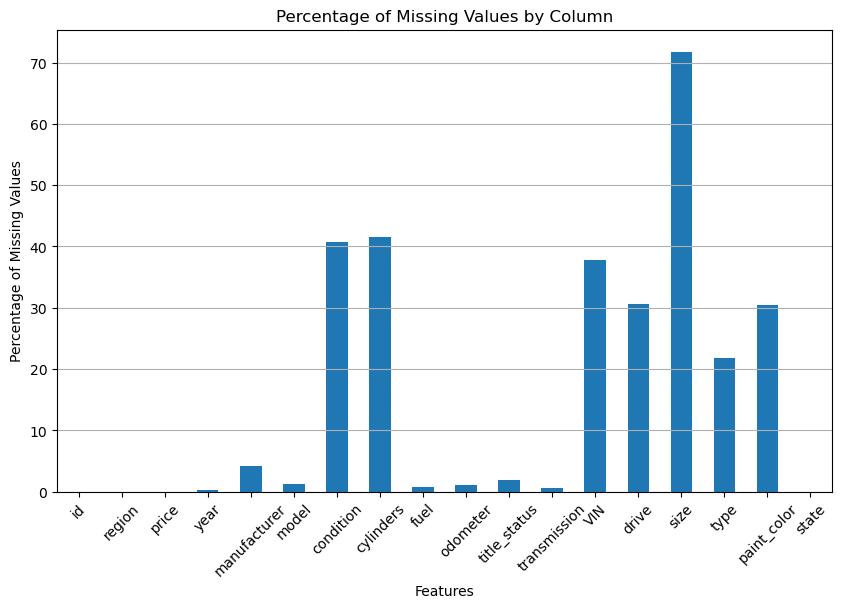

In [17]:
#Data Missing from many features
missing_data_series = vehicle_df.isna().mean()
missing_data_series_df= pd.Series(missing_data_series)
missing_data_series_df = missing_data_series_df * 100
# Plot the data
plt.figure(figsize=(10,6))
missing_data_series_df.plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45)
plt.grid(axis='y')

### Categorical Data Exploration

- Estimate the number of unique values within each categorical column.
- Based on this, we can consider if we want to include these features within the analysis.

| Column        | Unique Values |
|---------------|---------------|
| region        | 404           |
| manufacturer  | 42            |
| model         | 29649         |
| condition     | 6             |
| cylinders     | 8             |
| fuel          | 5             |
| title_status  | 6             |
| transmission  | 3             |
| VIN           | 118246        |
| drive         | 3             |
| size          | 4             |
| type          | 13            |
| paint_color   | 12            |
| state         | 51            |

- We can eliminate `VIN`, `model`, and `region` from the analysis, since there are too many categories within the feature

Unique values in region: 404
Unique values in manufacturer: 42
Unique values in model: 29649
Unique values in condition: 6
Unique values in cylinders: 8
Unique values in fuel: 5
Unique values in title_status: 6
Unique values in transmission: 3
Unique values in VIN: 118246
Unique values in drive: 3
Unique values in size: 4
Unique values in type: 13
Unique values in paint_color: 12
Unique values in state: 51


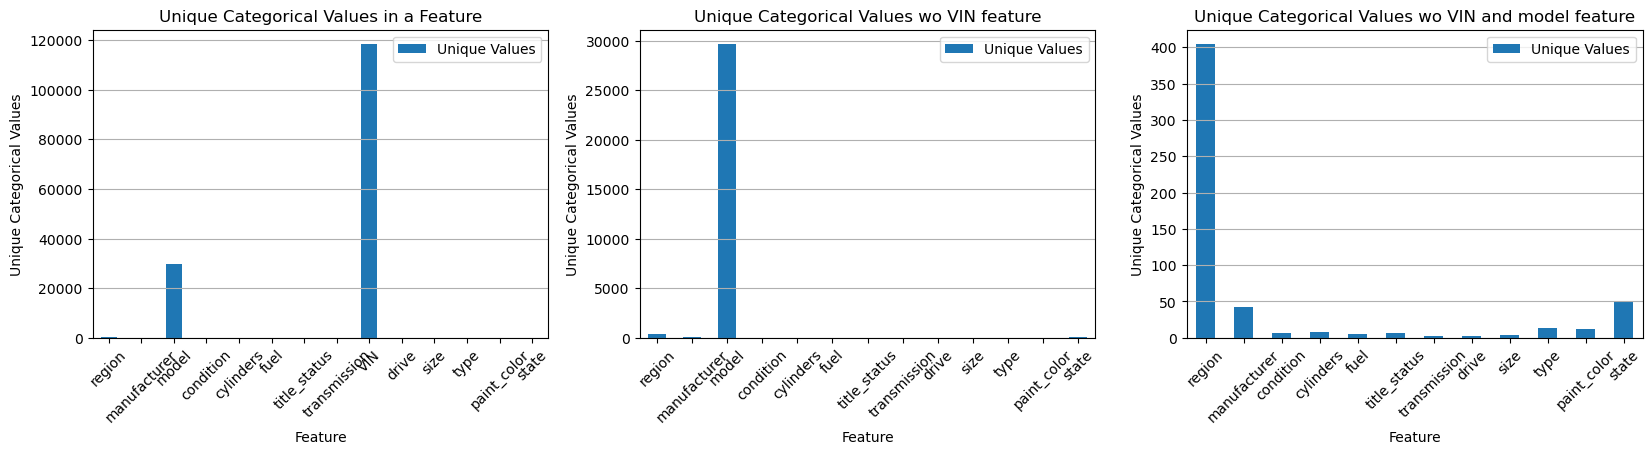

In [19]:
#List of all Categorical columns
categorical_columns = vehicle_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Estimate the number of unique elements for the categorical features
unique_elements = {col: vehicle_df[col].nunique() for col in categorical_columns}

#Print the values
for col, unique_vals in unique_elements.items():
    print(f"Unique values in {col}: {unique_vals}")

# Convert the dictionary to a DataFrame
nunique_df = pd.DataFrame(list(unique_elements.items()), columns=['Column', 'Unique Values'])

#Set index to Column
nunique_df = nunique_df.set_index('Column')

#Create a new data frame without the index VIN; there are over 120K unique values for VIN
nunique_df_noVIN = nunique_df.drop(index=['VIN'])

#Create a new data frame without the index VIN and model; there are over ~30K uniqye value for VIN; This makes the graph values readable 
nunique_df_noVIN_nomodel = nunique_df_noVIN.drop(index=['model'])

# Plot the data
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
nunique_df.plot(kind='bar',ax=plt.gca())
plt.title('Unique Categorical Values in a Feature')
plt.xlabel('Feature')
plt.ylabel('Unique Categorical Values')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.subplot(1,3,2)
nunique_df_noVIN.plot(kind='bar',ax=plt.gca())
plt.title('Unique Categorical Values wo VIN feature')
plt.xlabel('Feature')
plt.ylabel('Unique Categorical Values')
plt.xticks(rotation=45)
plt.grid(axis='y')


plt.subplot(1,3,3)
nunique_df_noVIN_nomodel.plot(kind='bar',ax=plt.gca())
plt.title('Unique Categorical Values wo VIN and model feature')
plt.xlabel('Feature')
plt.ylabel('Unique Categorical Values')
plt.xticks(rotation=45)
plt.grid(axis='y')

### Univariate and Bivariate Data Analysis

Text(0, 0.5, 'Price USD')

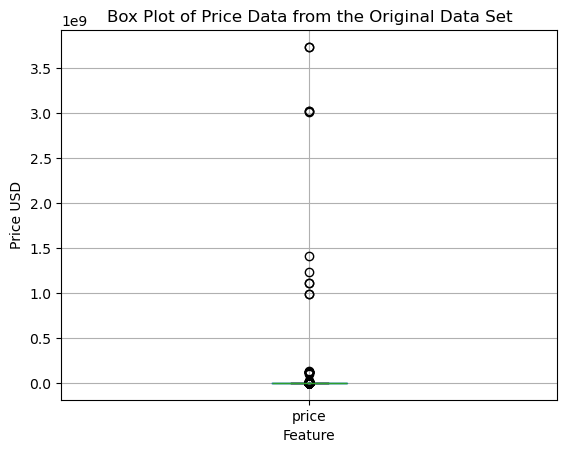

In [21]:
#Box plot for price
vehicle_df.boxplot('price')
plt.title('Box Plot of Price Data from the Original Data Set')
plt.xlabel('Feature')
plt.ylabel('Price USD')

Text(0, 0.5, 'Distance (miles)')

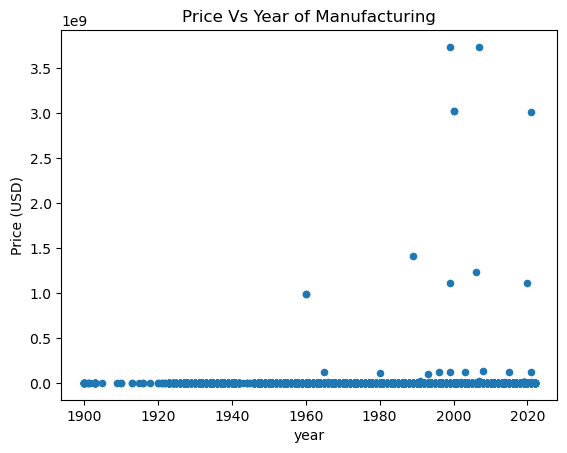

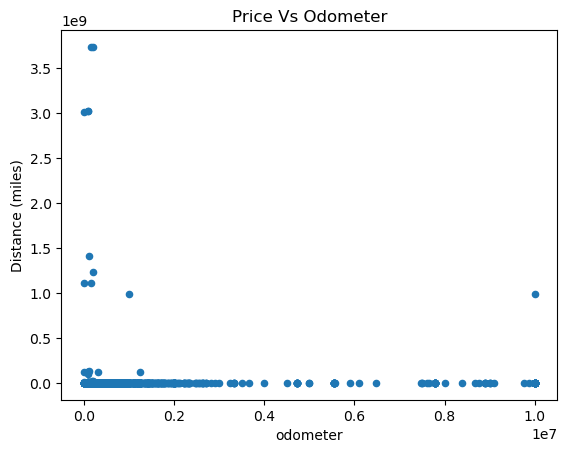

In [22]:
#Plot of Price Vs Year of Manufacture
vehicle_df.plot(kind='scatter',x='year',y='price')
plt.title('Price Vs Year of Manufacturing')
plt.ylabel('Price (USD)')
#Plot of Price Vs Year of Odometer reading
vehicle_df.plot(kind='scatter',x='odometer',y='price')
plt.title('Price Vs Odometer')
plt.ylabel('Distance (miles)')

### Dataset Cleaning Procedure

### Price Data Clean up
- Remove outliers,
- Upper bound: Q3 + 1.5 * IQR
- Lower Bound of Q1 - 1.5 * IQR results in negative results 
- Lower Bound is set to 2000, which is below the 15% percentile. A car value of 0 USD is not logical. For the car dealer a valure below 2000 USD is not a very profitable deal too.
- Remove Missing Values: This is done in the next section after feature selection
- Remove Duplicate Values: This is done in the next section after feature selection

In [25]:
# Function to remove outliers for Price column
def remove_outliers_iqr(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    #print(IQR)
    #lower_bound = Q1 - 1.5 * IQR
    lower_bound = 2000
    #print(f'Lower Bound: {lower_bound}')
    upper_bound = Q3 + 1.5 * IQR
    #print(f'Upper Bound: {upper_bound}')
    pass_cond = (df[col] >= lower_bound) & (df[col] <= upper_bound)
    return df[pass_cond]

In [26]:
#Remove outliers from Price data
clean_df = remove_outliers_iqr(vehicle_df,'price')

### Odometer Reading Data Clean Up
- Number of data points above 0.3e7 reading is 115.
- It is a small percentage compared to the entire data set. Removing odometer values above the value 0.3e7 in the analysis. 

In [28]:
## of data points above 0.3e7 
len(clean_df[clean_df['odometer'] > 0.3e7])

115

In [29]:
#Total number of samples within the feature odometer
len(clean_df['odometer'])

365726

Text(0, 0.5, 'Distance (miles)')

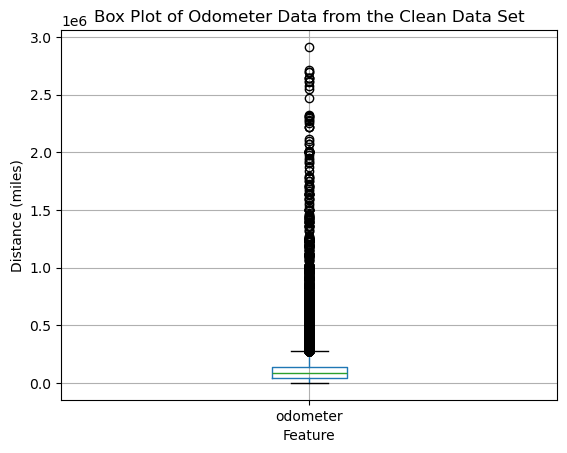

In [30]:
#Keep values between 100 and 0.3e7
clean_df = clean_df[clean_df['odometer'] < 0.3e7]
clean_df = clean_df[clean_df['odometer'] > 100]
clean_df.boxplot('odometer')
plt.title('Box Plot of Odometer Data from the Clean Data Set')
plt.xlabel('Feature')
plt.ylabel('Distance (miles)')

In [31]:
clean_df.describe()

id          price           year      odometer
count  3.597250e+05  359725.000000  358894.000000  3.597250e+05
mean   7.311447e+09   18662.239055    2011.132914  9.619497e+04
std    4.391834e+06   12422.336012       9.156253  7.905176e+04
min    7.301583e+09    2000.000000    1900.000000  1.010000e+02
25%    7.308046e+09    7995.000000    2008.000000  4.062600e+04
50%    7.312504e+09   15990.000000    2013.000000  8.932900e+04
75%    7.315226e+09   27500.000000    2017.000000  1.362060e+05
max    7.317101e+09   57341.000000    2022.000000  2.915272e+06

Text(0, 0.5, 'Price USD')

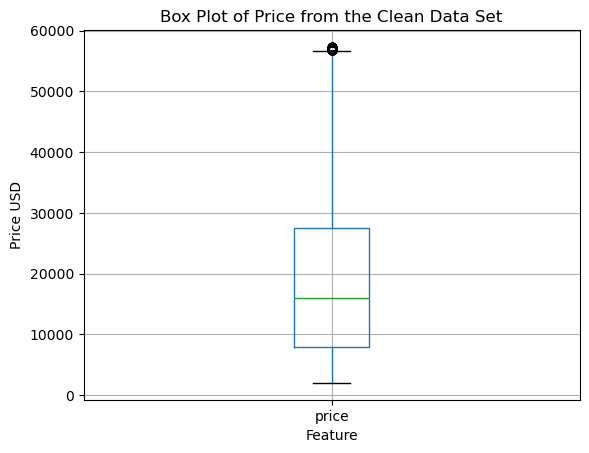

In [32]:
clean_df.boxplot('price')
plt.title('Box Plot of Price from the Clean Data Set')
plt.xlabel('Feature')
plt.ylabel('Price USD')

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### Modeling Approach #1: Features chosen: #2
- The critical parameters that will influence the cost of the car are
  1. Year
  2. Odometer
- Clean Dataset: Remove outliers, invalid data, missing data and duplicates 
- Determine the polynomial order for optimum mse for the following models
- Models
  1. Linear Regression
  2. Ridge Regression: determine the optimum alpha parameter
  3. Lasso Regression: determine the optimum alpha parameter 

In [35]:
model1_df = clean_df[['price','odometer','year']]

In [36]:
model1_df.isna().mean()

price       0.00000
odometer    0.00000
year        0.00231
dtype: float64

In [37]:
model1_df = model1_df.dropna()

### Correlation Analysis
- As odometer reading increases, price decreases
- As the age of the car increases, price decreases

In [39]:
model1_df.describe()

price      odometer           year
count  358894.000000  3.588940e+05  358894.000000
mean    18629.863642  9.634836e+04    2011.132914
std     12402.571348  7.907243e+04       9.156253
min      2000.000000  1.010000e+02    1900.000000
25%      7995.000000  4.078400e+04    2008.000000
50%     15990.000000  8.956750e+04    2013.000000
75%     27395.000000  1.363770e+05    2017.000000
max     57341.000000  2.915272e+06    2022.000000

In [40]:
model1_df.duplicated().mean()

0.44872023494402247

In [41]:
model1_df = model1_df.drop_duplicates()

In [42]:
model1_df.corr()

price  odometer      year
price     1.000000 -0.373960  0.319423
odometer -0.373960  1.000000 -0.200487
year      0.319423 -0.200487  1.000000

Text(0, 0.5, 'Price USD')

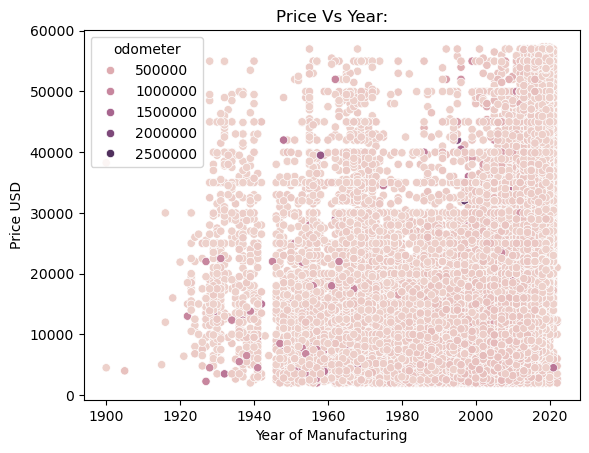

In [43]:
sns.scatterplot(data=model1_df,x='year',y='price',hue='odometer')
plt.title('Price Vs Year:')
plt.xlabel('Year of Manufacturing')
plt.ylabel('Price USD')

Text(0, 0.5, 'Price USD')

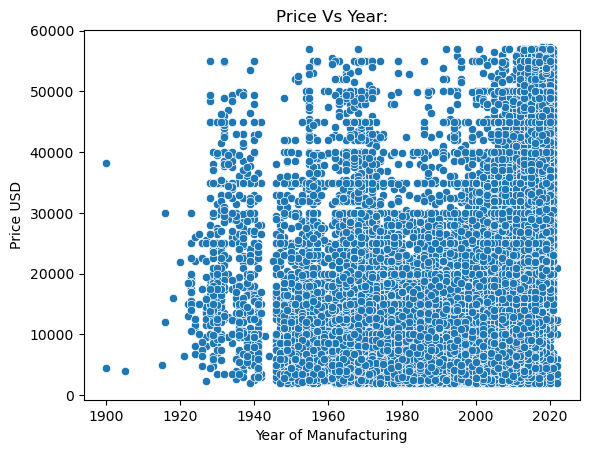

In [44]:
sns.scatterplot(data=model1_df,x='year',y='price')
plt.title('Price Vs Year:')
plt.xlabel('Year of Manufacturing')
plt.ylabel('Price USD')

Text(0, 0.5, 'Price (USD)')

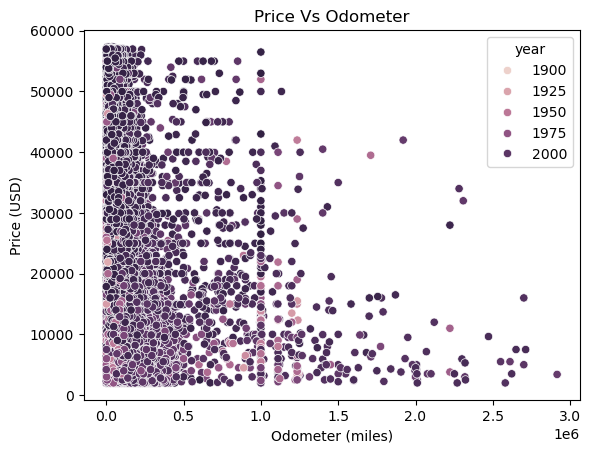

In [45]:
sns.scatterplot(data=model1_df,x='odometer',y='price',hue='year')
plt.title('Price Vs Odometer')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price (USD)')

Text(0, 0.5, 'Price USD')

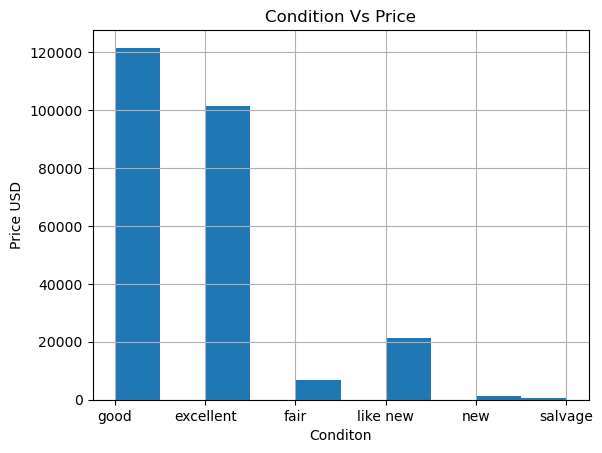

In [46]:
#plot condition feature histogram
vehicle_df['condition'].hist()
plt.title('Condition Vs Price')
plt.xlabel('Conditon')
plt.ylabel('Price USD')

Text(0, 0.5, 'Price USD')

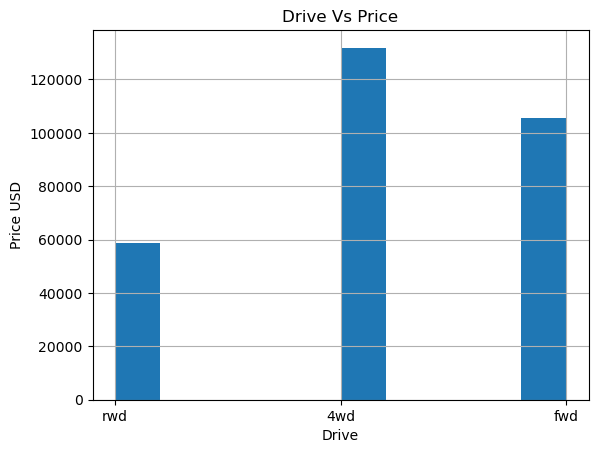

In [47]:
#plot Drive feature histogram
vehicle_df['drive'].hist()
plt.title('Drive Vs Price')
plt.xlabel('Drive')
plt.ylabel('Price USD')

Text(0, 0.5, 'Price USD')

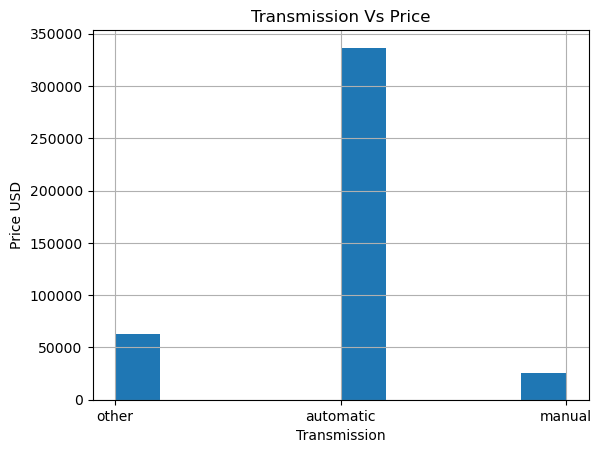

In [48]:
#plot Transmission feature histogram
vehicle_df['transmission'].hist()
plt.title('Transmission Vs Price')
plt.xlabel('Transmission')
plt.ylabel('Price USD')

Text(0, 0.5, 'Price USD')

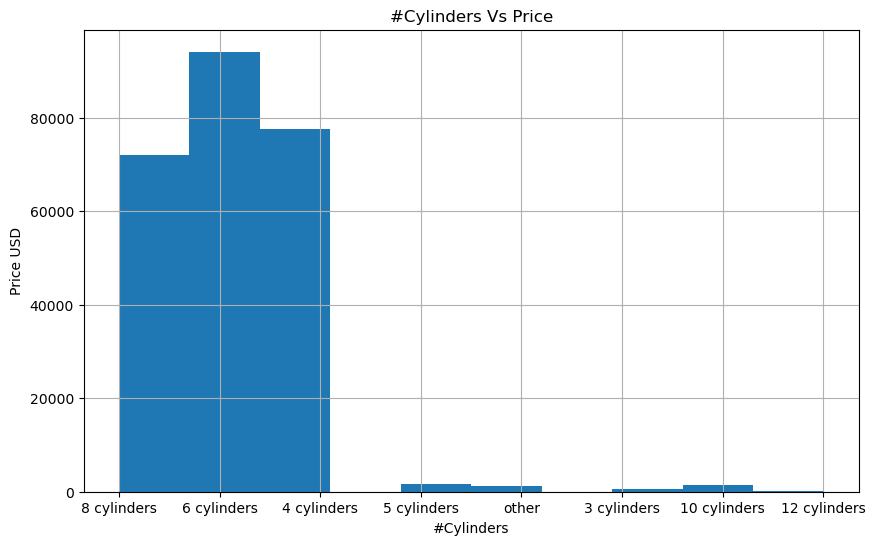

In [49]:
#plot Cylinder feature histogram
plt.figure(figsize=(10,6))
vehicle_df['cylinders'].hist()
plt.title('#Cylinders Vs Price')
plt.xlabel('#Cylinders')
plt.ylabel('Price USD')

Text(0, 0.5, 'Price USD')

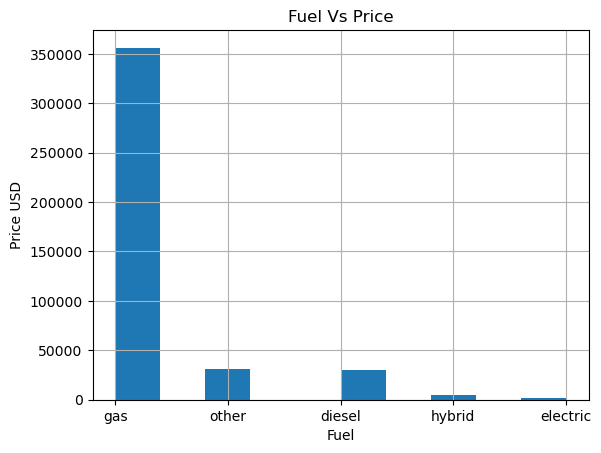

In [50]:
#plot Drive feature histogram
vehicle_df['fuel'].hist()
plt.title('Fuel Vs Price')
plt.xlabel('Fuel')
plt.ylabel('Price USD')

Text(0, 0.5, 'Price USD')

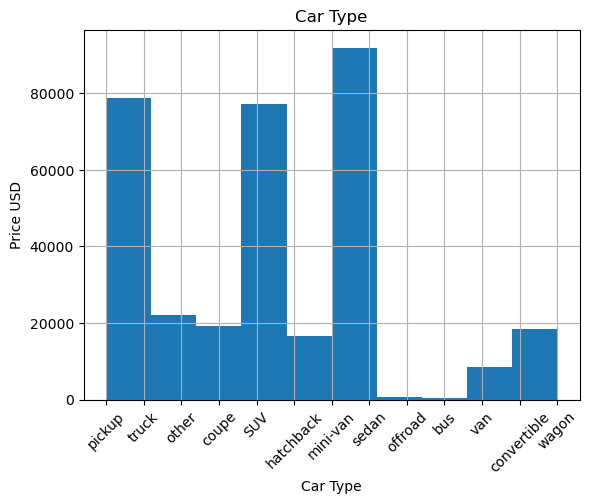

In [51]:
vehicle_df['type'].hist()
plt.title('Car Type')
plt.xlabel('Car Type')
plt.xticks(rotation=45)
plt.ylabel('Price USD')

Text(0, 0.5, 'Price USD')

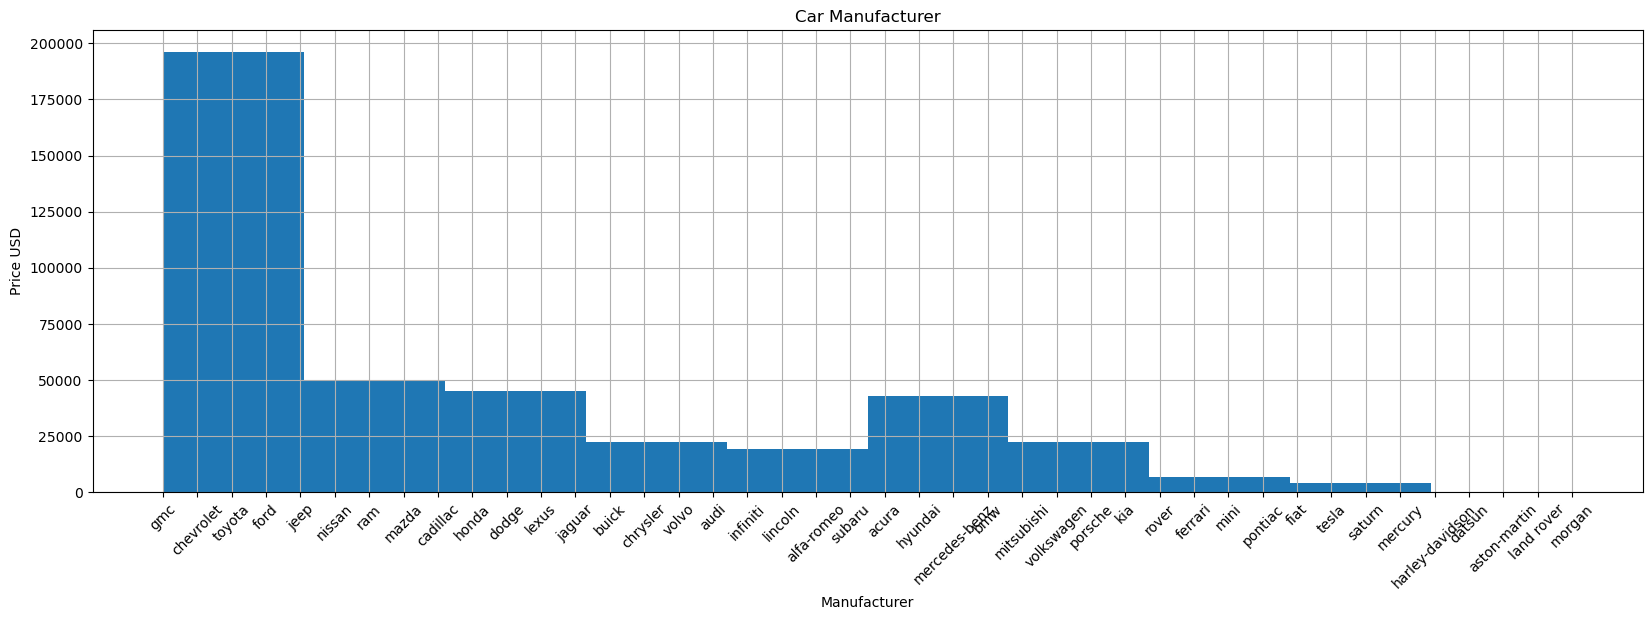

In [52]:
plt.figure(figsize=(20,6))
vehicle_df['manufacturer'].hist()
plt.title('Car Manufacturer')
plt.xlabel('Manufacturer')
plt.xticks(rotation=45)
plt.ylabel('Price USD')

### Model Configuration

| Model#   | Features                                                                 | RMSE (USD) |
|----------|--------------------------------------------------------------------------|------------|
| Model #1 | Year, Odometer | 8600 |
| Model #2 | Year, Odometer, Manufacturer | 6582 |
| Model #3 | Year, Odometer, Condition | 6747 |
| Model #4 | Year, Odometer, Fuel | 7051 |
| Model #5 | Year, Odometer, Drive | 6415 |
| Model #6 | Year, Odometer, Type | 6283 |
| Model #7 | Year, Odometer, Transmission | 7410 |
| Model #8 | Year, Odometer, Transmission, Condition, Type | 5552 |
| Model #9 | Year, Odometer, Transmission, Condition, Type, Manufacturer, Fuel, State | 7356 |
| Model #10 | Year, Odometer, Transmission, Condition, Type, Manufacturer | 4763 |r | 4763 |


### Data Analysis Approach

1. **Find critical parameters based on intuition and real-world understanding of the problem.**

2. **Numerical data:**
   - Analyze data distribution using box plots and the `describe` function. Remove outliers if any. Adjust the lower and upper bounds based on common sense. For instance, 100K USD for a used Toyota is not realistic.
   - Look for missing values using the `isna` function. Estimate the percentage of missing values. If the percentage of missing data is small, remove the rows with missing values.
   - Look for duplicates using the `duplicated` function. Remove the duplicates using `drop_duplicates`.

3. **Non-numerical data:**
   - Remove categories with many features.
   - Based on intuition, choose some of the non-numerical data that will be critical for price det For eg, ID will not influence the car priceermination.
   - Identify the unique values within the feature.
   - Remove 
   - Remove Duplicates`NaN` values.NaN` values.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Model#1: Split into Test and Train data

In [62]:
#Split data into train and test
X = model1_df.drop('price', axis = 1)
y = model1_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

### Linear Regression on Single Feature Odometer

In [64]:
#Instantiate a Linear Regression model and fit it to the odometer feature in training data set
lr = LinearRegression().fit(X_train[['odometer']], y_train)

#Calculate root mean square error for training data set
model_1_train_rmse = np.sqrt(mean_squared_error(y_train, lr.predict(X_train[['odometer']])))

#Calculate root mean square error for test data set
model_1_test_rmse = np.sqrt(mean_squared_error(y_test, lr.predict(X_test[['odometer']])))

# Calculate R-squared for training and test data set
r2_1feat_odo_train = lr.score(X_train[['odometer']],y_train)
r2_1feat_odo_test = lr.score(X_test[['odometer']],y_test)

#print the RMSE and R^2 data
print(f'Train RMSE Single Feature Odometer: {model_1_train_rmse: .2f}')
print(f'Test RMSE Single Feature Odomete: {model_1_test_rmse: .2f}')
print(f'Train R-squared Single Feature Odomete: {r2_1feat_odo_train:.2f}')
print(f'Test R-squared Single Feature Odomete: {r2_1feat_odo_test:.2f}')

Train RMSE Single Feature Odometer:  10435.12
Test RMSE Single Feature Odomete:  10481.32
Train R-squared Single Feature Odomete: 0.14
Test R-squared Single Feature Odomete: 0.14


### Linear Regression on Single Feature Year

In [66]:
#Instantiate a Linear Regression model and fit it to the year feature in training data set
lr = LinearRegression().fit(X_train[['year']], y_train)

#Calculate root mean square error for training and test data set

model_1_year_train_rmse = np.sqrt(mean_squared_error(y_train, lr.predict(X_train[['year']])))
model_1_year_test_rmse = np.sqrt(mean_squared_error(y_test, lr.predict(X_test[['year']])))

# Calculate R-squared for training and test data set
r2_1feat_year_train = lr.score(X_train[['year']],y_train)
r2_1feat_year_test = lr.score(X_test[['year']],y_test)

print(f'Train RMSE Single Feature Year: {model_1_year_train_rmse: .2f}')
print(f'Test RSE Single Feature Year: {model_1_year_test_rmse: .2f}')
print(f'Train R-squared Single Feature Year: {r2_1feat_year_train:.5f}')
print(f'Test R-squared Single Feature Year: {r2_1feat_year_test:.5f}')

Train RMSE Single Feature Year:  10663.10
Test RSE Single Feature Year:  10706.69
Train R-squared Single Feature Year: 0.10244
Test R-squared Single Feature Year: 0.10106


### Linear Regression on Features Odometer and Year

In [68]:
#Instantiate a Linear Regression model and fit it to the year and odometer feature in training data set
lr2 = LinearRegression(fit_intercept=True).fit(X_train, y_train)
model_2_train_rmse = np.sqrt(mean_squared_error(y_train, lr2.predict(X_train)))
model_2_test_rmse =  np.sqrt(mean_squared_error(y_test, lr2.predict(X_test[['odometer','year']])))

# Calculate R-squared
r2_2feat_year_odo_train = lr.score(X_train[['year']],y_train)
r2_2feat_year_odo_test = lr.score(X_test[['year']],y_test)

print(f'Train MSE for two features, year and odometer: {model_2_train_rmse: .2f}')
print(f'Test MSE for two features, year and odometer: {model_2_test_rmse: .2f}')
print(f'Train R-squared for two features, year and odometer: {r2_2feat_year_odo_train:.5f}')
print(f'Test R-squared for two features, year and odometer: {r2_2feat_year_odo_test:.5f}')

Train MSE for two features, year and odometer:  10047.40
Test MSE for two features, year and odometer:  10101.79
Train R-squared for two features, year and odometer: 0.10244
Test R-squared for two features, year and odometer: 0.10106


### Take away
- Linear Regression: Single feature odometer: R^2 value is close to 0, indicates the model is very poor
- Linear Regression: Single feature year: R^2 value is close to 0, indicates the model is very poor
- Linear Regression: Two features year and odometer: R^2 value is close to 0, indicates the model is very poor

In [70]:
error_dict = {'Features': ['1 Numerical Feature: Odometer', '1 Numerical Feature: Year','2 Numerical Features: Odometer and Year'],
              'RMSE Train': [model_1_train_rmse,model_1_year_train_rmse,model_2_train_rmse],
              'RMSE Test': [model_1_test_rmse,model_1_year_test_rmse,model_2_test_rmse],
              'R^2 Train': [r2_1feat_odo_train,r2_1feat_year_train,r2_2feat_year_odo_train],
              'R^2 Test': [r2_1feat_odo_test,r2_1feat_year_test,r2_2feat_year_odo_test]}

# Truncate the numerical values to 2 decimal points
error_dict['RMSE Train'] = [round(val, 2) for val in error_dict['RMSE Train']]
error_dict['RMSE Test'] = [round(val, 2) for val in error_dict['RMSE Test']]
error_dict['R^2 Train'] = [round(val, 5) for val in error_dict['R^2 Train']]
error_dict['R^2 Test'] = [round(val, 5) for val in error_dict['R^2 Test']]

error_df = pd.DataFrame(error_dict).set_index('Features')
error_df

RMSE Train  RMSE Test  R^2 Train  \
Features                                                                    
1 Numerical Feature: Odometer              10435.12   10481.32    0.14041   
1 Numerical Feature: Year                  10663.10   10706.69    0.10244   
2 Numerical Features: Odometer and Year    10047.40   10101.79    0.10244   

                                         R^2 Test  
Features                                           
1 Numerical Feature: Odometer             0.13851  
1 Numerical Feature: Year                 0.10106  
2 Numerical Features: Odometer and Year   0.10106

###  Model#1a: Polynominal Regression; determine the best order for single feature of odometer
- The above linear regression has model with order of 1.
- Estimate the RMSE and R^2 for different degree of polynomial fetaures

In [72]:
###  Model#1a: Polynominal Regression; determine the best order for single feature of odometer
#Split data into train and test data set
X = model1_df.drop('price', axis = 1)
y = model1_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

#Select single feature odometer for this analysis
X1_train = X_train[['odometer']]
X1_test = X_test[['odometer']]

model_1fea_odo_Poly_train_rmse = []
model_1fea_odo_Poly_test_rmse = []
model_1fea_odo_Poly_train_mae = []
model_1fea_odo_Poly_test_mae = []
r2_model1_1fea_odo_Poly_train = []
r2_model1_1fea_odo_Poly_test = []

for i in range(1, 11):
    #Set up a pipleine to sweep the Polynomial features for Linear Regression
    pipe = Pipeline([('quad_features', PolynomialFeatures(degree = i, include_bias = True)), ('quad_model', LinearRegression())])
    #fit training data
    pipe.fit(X1_train, y_train)
    #predict the results for training set
    preds_train = pipe.predict(X1_train)
    #predict the results for test set
    preds_test = pipe.predict(X1_test)
    model_1fea_odo_Poly_train_rmse.append(np.sqrt(mean_squared_error(y_train, preds_train)))
    model_1fea_odo_Poly_test_rmse.append(np.sqrt(mean_squared_error(y_test, preds_test)))
    model_1fea_odo_Poly_train_mae.append(mean_absolute_error(y_train, preds_train))
    model_1fea_odo_Poly_test_mae.append(mean_absolute_error(y_test, preds_test))
    r2_model1_1fea_odo_Poly_train.append(pipe.score(X1_train,y_train))
    r2_model1_1fea_odo_Poly_test.append(pipe.score(X1_test,y_test))

    
print(model_1fea_odo_Poly_train_rmse)
print(model_1fea_odo_Poly_test_rmse)
print(model_1fea_odo_Poly_train_mae)
print(model_1fea_odo_Poly_test_mae)
print(r2_model1_1fea_odo_Poly_train)
print(r2_model1_1fea_odo_Poly_test)



[10435.119830042066, 9849.834132524313, 9548.870377233654, 10629.06557501754, 11223.133353889903, 11253.324110236526, 11254.266163349668, 11254.344797757227, 11254.39743657209, 11254.469325385548]
[10481.324927791018, 9942.310348932644, 9598.203746273437, 10819.086449120185, 11282.089674500863, 11290.999128165206, 11291.482753651822, 11291.80874813233, 11292.616656663291, 11294.039068074346]
[7915.570076466276, 7412.233670227183, 7163.065124684321, 8139.367830888446, 8863.0233002676, 8894.014332500807, 8894.943289978177, 8895.018406126952, 8895.08018237743, 8895.155247465831]
[7943.527964000648, 7437.940470180903, 7179.920717962444, 8174.111444032944, 8897.023894275871, 8926.537819298974, 8927.397288903545, 8927.731982435826, 8928.114992475616, 8928.532270811687]
[0.1404058026761339, 0.23412758344623752, 0.28021533476513194, 0.10815626309871906, 0.00567847638456187, 0.0003217378354739564, 0.0001543580589214999, 0.0001403860161011128, 0.0001310329086321449, 0.00011825930193609668]
[0.13

###  Model#1b: Polynominal Regression; determine the best order for single feature of Year


In [74]:
###  Model#1b: Polynominal Regression; determine the best order for single feature of year
#Split data into train and test data set
X = model1_df.drop('price', axis = 1)
y = model1_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

#Select single feature year for this analysis
X1_train = X_train[['year']]
X1_test = X_test[['year']]

model_1fea_year_Poly_train_rmse = []
model_1fea_year_Poly_test_rmse = []
model_1fea_year_Poly_train_mae = []
model_1fea_year_Poly_test_mae = []
r2_model1_1fea_year_Poly_train = []
r2_model1_1fea_year_Poly_test = []


for i in range(1, 11):
    #Set up a pipleine to sweep the Polynomial features for Linear Regression
    pipe = Pipeline([('quad_features', PolynomialFeatures(degree = i, include_bias = True)), ('quad_model', LinearRegression())])
    #fit training data
    pipe.fit(X1_train, y_train)
    #predict the results for training set
    preds_train = pipe.predict(X1_train)
    #predict the results for test set
    preds_test = pipe.predict(X1_test)
    model_1fea_year_Poly_train_rmse.append(np.sqrt(mean_squared_error(y_train, preds_train)))
    model_1fea_year_Poly_test_rmse.append(np.sqrt(mean_squared_error(y_test, preds_test)))
    model_1fea_year_Poly_train_mae.append(mean_absolute_error(y_train, preds_train))
    model_1fea_year_Poly_test_mae.append(mean_absolute_error(y_test, preds_test))
    r2_model1_1fea_year_Poly_train.append(pipe.score(X1_train,y_train))
    r2_model1_1fea_year_Poly_test.append(pipe.score(X1_test,y_test))


print(model_1fea_year_Poly_train_rmse)
print(model_1fea_year_Poly_test_rmse)
print(model_1fea_year_Poly_train_mae)
print(model_1fea_year_Poly_test_mae)
print(r2_model1_1fea_year_Poly_train)
print(r2_model1_1fea_year_Poly_test)


[10663.100564409222, 9337.78237385312, 8683.461671536132, 8676.992969020213, 8670.673762804, 8664.501099293268, 8658.472115453276, 8652.584035141985, 8646.83416602505, 8641.21989650424]
[10706.692193817027, 9324.832099225703, 8675.08991547777, 8668.573846645582, 8662.22402884179, 8656.03644805619, 8650.007214107281, 8644.13269010038, 8638.409297818105, 8632.833601802768]
[8307.645062739792, 7074.760289660049, 6462.947867755675, 6456.781213937876, 6450.795920319258, 6444.943296034866, 6439.208991994574, 6433.6080846584355, 6428.144027689604, 6422.798164354188]
[8336.293362979892, 7070.809523572862, 6459.942541374946, 6453.848227004155, 6447.94392967201, 6442.178635190535, 6436.537859301306, 6431.059060272099, 6425.728504357902, 6420.485837498667]
[0.10243563045772364, 0.31168681292916756, 0.4047705955465266, 0.40565709172455544, 0.40652246243580337, 0.407367156463878, 0.40819160803056787, 0.4089962374064907, 0.40978145143598765, 0.4105476440544681]
[0.1010627313867758, 0.318131241208846

###  Model#1c: Polynominal Regression; determine the best order for two features of odometer and year

In [76]:
###  Model#1c: Polynominal Regression; determine the best order for two features of odometer and year
#Split data into train and test data set
X = model1_df.drop('price', axis = 1)
y = model1_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

model_2feature_Poly_train_rmse = []
model_2feature_Poly_test_rmse = []
model_2feature_Poly_train_mae = []
model_2feature_Poly_test_mae = []
r2_model1_2fea_Poly_train = []
r2_model1_2fea_Poly_test = []

for i in range(1, 11):
    #Set up a pipleine to sweep the Polynomial features for Linear Regression
    pipe = Pipeline([('quad_features', PolynomialFeatures(degree = i, include_bias = True)), ('quad_model', LinearRegression())])
    pipe.fit(X_train, y_train)
    preds_train = pipe.predict(X_train)
    preds_test = pipe.predict(X_test)
    model_2feature_Poly_train_rmse.append(np.sqrt(mean_squared_error(y_train, preds_train)))
    model_2feature_Poly_test_rmse.append(np.sqrt(mean_squared_error(y_test, preds_test)))
    model_2feature_Poly_train_mae.append(mean_absolute_error(y_train, preds_train))
    model_2feature_Poly_test_mae.append(mean_absolute_error(y_test, preds_test))
    r2_model1_2fea_Poly_train.append(pipe.score(X_train,y_train))
    r2_model1_2fea_Poly_test.append(pipe.score(X_test,y_test))


print(model_2feature_Poly_train_rmse)
print(model_2feature_Poly_test_rmse)
print(model_2feature_Poly_train_mae)
print(model_2feature_Poly_test_mae)
print(r2_model1_2fea_Poly_train)
print(r2_model1_2fea_Poly_test)


[10047.402545839304, 8904.148880426326, 8729.811292161052, 9067.470358296585, 8986.12332062549, 9902.711140788691, 10751.450426329571, 11211.78466583914, 11253.901192023883, 11350.59175531944]
[10101.79224584981, 8928.246441562529, 8759.079848744215, 9149.759760767707, 9082.714564196704, 10601.716288837868, 13184.98209482267, 12859.934250125074, 11361.733169214689, 15983.293476609037]
[7599.9242618396975, 6674.394586157537, 6496.319068644907, 6757.7325422990225, 6663.324151070435, 7542.9207233923435, 8316.248123673626, 8842.740381812968, 8894.49514530854, 8911.544006638042]
[7625.363793638486, 6669.310879824405, 6489.925053585817, 6773.315911407136, 6680.7796736261735, 7580.941756156019, 8375.364231967324, 8902.323494137594, 8932.428833897973, 8993.738868437753]
[0.2030956473748361, 0.3741310304656489, 0.39839933763863056, 0.3509608666771302, 0.36255408461481897, 0.2258826237881999, 0.08750034795233652, 0.0076883499548845435, 0.0002192061915674559, -0.01703430357000335]
[0.199768548605

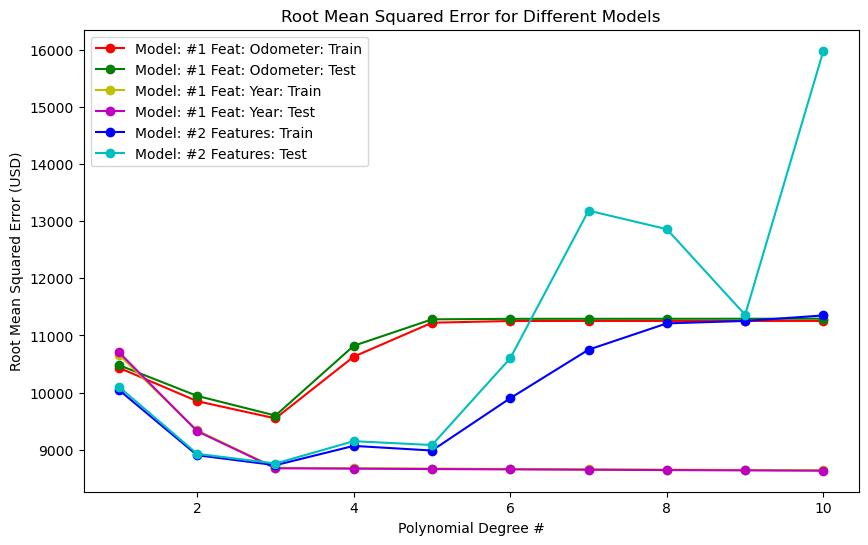

In [77]:
#plot the RMSE results for different models
degree = np.linspace(1,10,10)
plt.figure(figsize=(10,6))
plt.plot(degree, model_1fea_odo_Poly_train_rmse, marker='o', linestyle='-', color='r', label='Model: #1 Feat: Odometer: Train')
plt.plot(degree, model_1fea_odo_Poly_test_rmse, marker='o', linestyle='-', color='g', label='Model: #1 Feat: Odometer: Test')

plt.plot(degree, model_1fea_year_Poly_train_rmse, marker='o', linestyle='-', color='y', label='Model: #1 Feat: Year: Train')
plt.plot(degree, model_1fea_year_Poly_test_rmse, marker='o', linestyle='-', color='m', label='Model: #1 Feat: Year: Test')


plt.plot(degree, model_2feature_Poly_train_rmse, marker='o', linestyle='-', color='b', label='Model: #2 Features: Train')
plt.plot(degree, model_2feature_Poly_test_rmse, marker='o', linestyle='-', color='c', label='Model: #2 Features: Test')

plt.xlabel('Polynomial Degree #')
plt.ylabel('Root Mean Squared Error (USD)')
plt.title('Root Mean Squared Error for Different Models')
plt.legend()
plt.show()

### Key Takeaway
- Model with single feature "year" with polynomial degree 3 and higher has the least RMSE compare to the model with single feature odometer
- Model with two features "year and odometer" with polynomial degree 3 is comparable to the model with single feature year with polynomial order 3. We can see overfitting as the order increases futher.
- The median price of the price is ~12K USD. The RMSE is ~8.6K. The error is too high to make accurate prediction
- The R^2 and MAE shows the same conclusion

In [79]:
model1_df.describe()

price      odometer           year
count  197851.000000  1.978510e+05  197851.000000
mean    15343.510804  1.093659e+05    2009.296956
std     11266.433504  8.642147e+04      10.479036
min      2000.000000  1.010000e+02    1900.000000
25%      6750.000000  5.835650e+04    2006.000000
50%     11995.000000  1.020000e+05    2012.000000
75%     20990.000000  1.468440e+05    2015.000000
max     57341.000000  2.915272e+06    2022.000000

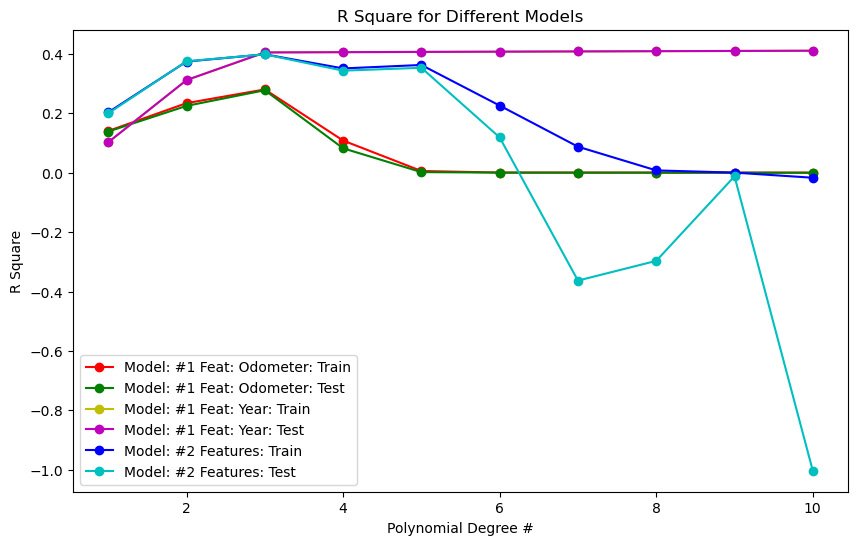

In [80]:
#plot the reusults comparing R^2 for different models 
degree = np.linspace(1,10,10)
plt.figure(figsize=(10,6))
plt.plot(degree, r2_model1_1fea_odo_Poly_train, marker='o', linestyle='-', color='r', label='Model: #1 Feat: Odometer: Train')
plt.plot(degree, r2_model1_1fea_odo_Poly_test, marker='o', linestyle='-', color='g', label='Model: #1 Feat: Odometer: Test')

plt.plot(degree, r2_model1_1fea_year_Poly_train, marker='o', linestyle='-', color='y', label='Model: #1 Feat: Year: Train')
plt.plot(degree, r2_model1_1fea_year_Poly_train, marker='o', linestyle='-', color='m', label='Model: #1 Feat: Year: Test')


plt.plot(degree, r2_model1_2fea_Poly_train, marker='o', linestyle='-', color='b', label='Model: #2 Features: Train')
plt.plot(degree, r2_model1_2fea_Poly_test, marker='o', linestyle='-', color='c', label='Model: #2 Features: Test')

plt.xlabel('Polynomial Degree #')
plt.ylabel('R Square')
plt.title('R Square for Different Models')
plt.legend()
plt.show()

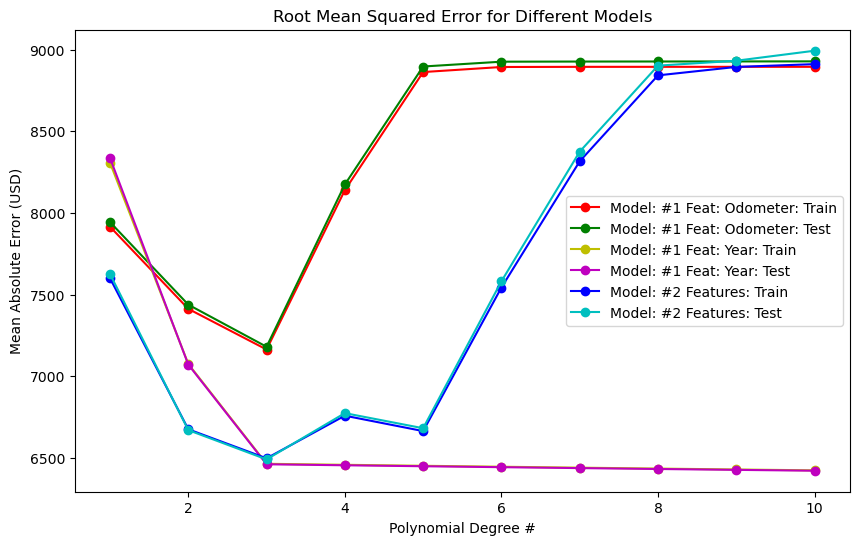

In [280]:
#plot the reusults comparing MAE for different models 
degree = np.linspace(1,10,10)
plt.figure(figsize=(10,6))
plt.plot(degree, model_1fea_odo_Poly_train_mae, marker='o', linestyle='-', color='r', label='Model: #1 Feat: Odometer: Train')
plt.plot(degree, model_1fea_odo_Poly_test_mae, marker='o', linestyle='-', color='g', label='Model: #1 Feat: Odometer: Test')

plt.plot(degree, model_1fea_year_Poly_train_mae, marker='o', linestyle='-', color='y', label='Model: #1 Feat: Year: Train')
plt.plot(degree, model_1fea_year_Poly_test_mae, marker='o', linestyle='-', color='m', label='Model: #1 Feat: Year: Test')


plt.plot(degree, model_2feature_Poly_train_mae, marker='o', linestyle='-', color='b', label='Model: #2 Features: Train')
plt.plot(degree, model_2feature_Poly_test_mae, marker='o', linestyle='-', color='c', label='Model: #2 Features: Test')

plt.xlabel('Polynomial Degree #')
plt.ylabel('Mean Absolute Error (USD)')
plt.title('Root Mean Squared Error for Different Models')
plt.legend()
plt.show()

### Compare prediction Vs Raw data on a plot for the best RMSW configuration; of two features, year and odometer with polynomial degree 3
- Since the RMSE is ~8.6K we can see this delta between the prediction and raw data

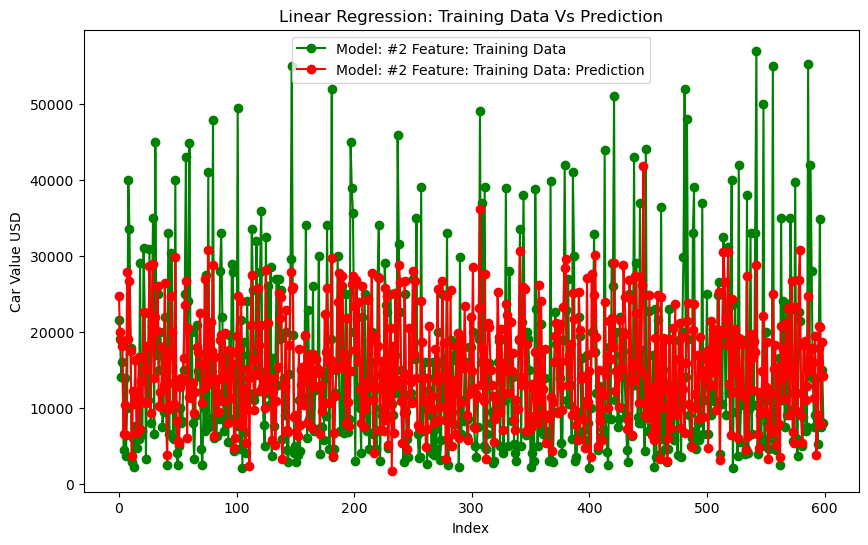

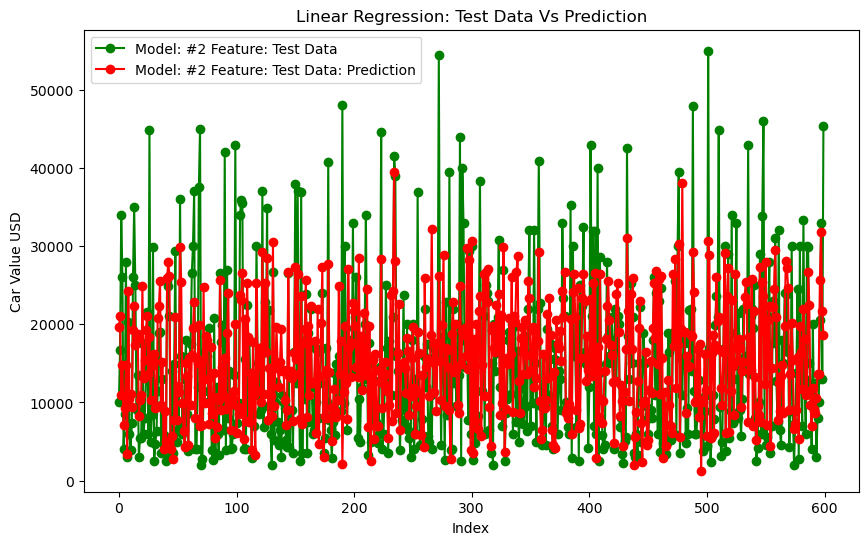

In [83]:
#split the data into train and test
X = model1_df.drop('price', axis = 1)
y = model1_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

#set up pipleine for linear Regression to fit and predict for polynomial degree 3
pipe2 = Pipeline([('quad_features', PolynomialFeatures(degree = 3, include_bias = True)), ('quad_model', LinearRegression())])
pipe2.fit(X_train, y_train)
preds_train = pipe2.predict(X_train)
preds_test = pipe2.predict(X_test)

#plot the data
plt.figure(figsize=(10,6))
plt.plot(y_train.reset_index()['price'][0:600], marker='o', linestyle='-', color='g', label='Model: #2 Feature: Training Data')
plt.plot(preds_train[0:600], marker='o', linestyle='-', color='r', label='Model: #2 Feature: Training Data: Prediction')

plt.xlabel('Index')
plt.ylabel('Car Value USD')
plt.title('Linear Regression: Training Data Vs Prediction')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(y_test.reset_index()['price'][0:600], marker='o', linestyle='-', color='g', label='Model: #2 Feature: Test Data')
plt.plot(preds_test[0:600], marker='o', linestyle='-', color='r', label='Model: #2 Feature: Test Data: Prediction')

plt.xlabel('Index')
plt.ylabel('Car Value USD')
plt.title('Linear Regression: Test Data Vs Prediction')
plt.legend()
plt.show()

### Linear Regression; 2 Features: year and odometer; Polynomial Order 3: Coefficient Comparison
- odometer and year^2 are the dominating features with coefficienct values 0.265 and -12.7 respectively 

### Linear Regression; 1 Features: year; Polynomial Order 3: Coefficient Comparison
- year and year^2 are dominant features with coefficient values 5.33467708e+06 -2.70527087e+03 respectively 

RMSE Train: 8729.811292161052
RMSE Test: 8759.079848744215
Coefficients: [ 0.00000000e+00  2.65746442e-01 -6.42354001e-03 -2.76130025e-06
  1.29128343e-03 -1.27438618e+01 -3.23131031e-14  1.43074408e-09
 -7.29463659e-07  4.29447946e-03]


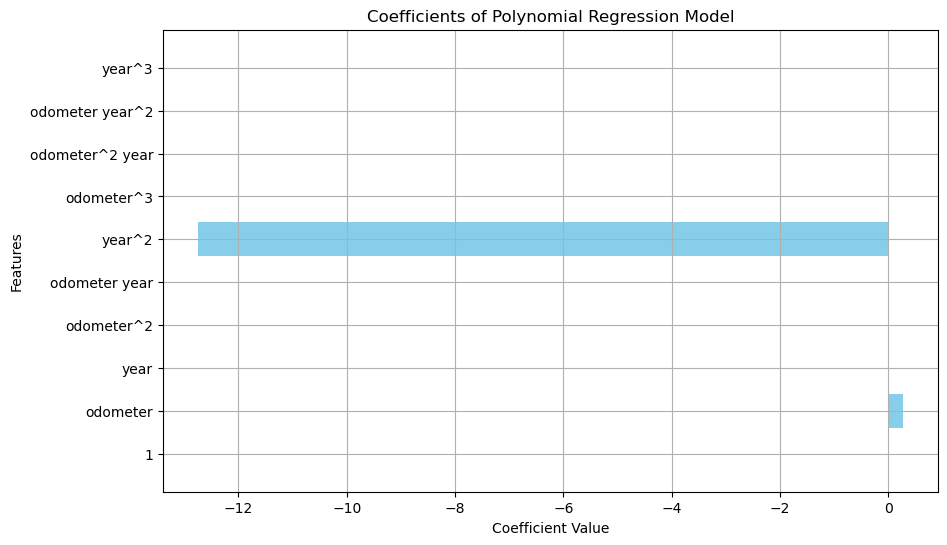

In [85]:
#split the data into train and test data
X = model1_df.drop('price', axis = 1)
y = model1_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

#set up pipleine for linear Regression to fit and predict for polynomial degree 3 for two features year and odometer
pipe = Pipeline([('quad_features', PolynomialFeatures(degree = 3, include_bias = True)), ('quad_model', LinearRegression())])
pipe.fit(X_train, y_train)
preds_train = pipe.predict(X_train)
preds_test = pipe.predict(X_test)

#RMSE Calculation
model_2feature_Poly_deg3_train_rmse = np.sqrt(mean_squared_error(y_train, preds_train))
model_2feature_Poly_deg3_test_rmse = np.sqrt(mean_squared_error(y_test, preds_test))

print(f'RMSE Train: {model_2feature_Poly_deg3_train_rmse}')
print(f'RMSE Test: {model_2feature_Poly_deg3_test_rmse}')


# Get the feature names from PolynomialFeatures
poly_features = pipe.named_steps['quad_features']
feature_names = poly_features.get_feature_names_out() 

# Get the coefficients from the linear regression model
coefficients = pipe.named_steps['quad_model'].coef_
print(f'Coefficients: {coefficients}')
# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Coefficients of Polynomial Regression Model')
plt.grid(True)
plt.show()


### Linear Regression; 1 Features: year; Polynomial Order 3: Coefficient Comparison
- year and year^2 are dominant features with coefficient values 5.33467708e+06 -2.70527087e+03 respectively 

RMSE Train: 8683.461671536132
RMSE Test: 8675.08991547777
[ 0.00000000e+00  5.33467708e+06 -2.70527087e+03  4.57227627e-01]


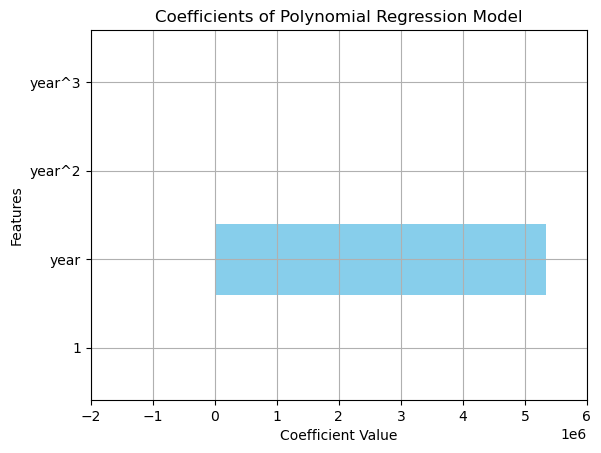

In [87]:
#split the data into train and test data
X = model1_df.drop('price', axis = 1)
y = model1_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

#set up pipleine for linear Regression to fit and predict for polynomial degree 3 for single feature year
pipe = Pipeline([('quad_features', PolynomialFeatures(degree = 3, include_bias = True)), ('quad_model', LinearRegression())])
pipe.fit(X_train[['year']], y_train)
preds_train = pipe.predict(X_train[['year']])
preds_test = pipe.predict(X_test[['year']])
model_2feature_Poly_train_rmse2 = np.sqrt(mean_squared_error(y_train, preds_train))
model_2feature_Poly_test_rmse2 = np.sqrt(mean_squared_error(y_test, preds_test))

print(f'RMSE Train: {model_2feature_Poly_train_rmse2}')
print(f'RMSE Test: {model_2feature_Poly_test_rmse2}')

# Get the feature names from PolynomialFeatures
poly_features = pipe.named_steps['quad_features']
#feature_names = poly_features.get_feature_names_out(input_features=['year']) 
feature_names = poly_features.get_feature_names_out() 

# Get the coefficients from the linear regression model
coefficients = pipe.named_steps['quad_model'].coef_
print(coefficients)
# Plotting the coefficients
#plt.figure(figsize=(10, 6))
plt.xlim(-2e6, 6e6)
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Coefficients of Polynomial Regression Model')
plt.grid(True)
plt.show()


### Ridge Regression; 2 Features: year and odometer; Polynomial Degree Tuning; alpha = 1
- As polynomial degree increases the RMSE reduces

In [89]:
#Split data into train and test data set

X = model1_df.drop('price', axis = 1)
y = model1_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
coef_list_Poly = []
rmse_ridge_Poly_train = []
rmse_ridge_Poly_test = []

for i in range(1, 11):
    #Set up pipeline for Ridge Regression with Polynomial features tuning, Standard Scalar and Ridge Regression
    scaled_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = i, include_bias = True)),
                      ('scaler', StandardScaler()),
                     ('ridge', Ridge())]).fit(X_train, y_train)
    train_preds = scaled_pipe.predict(X_train)
    test_preds = scaled_pipe.predict(X_test)
    rmse_ridge_Poly_train.append(np.sqrt(mean_squared_error(y_train, train_preds)))
    rmse_ridge_Poly_test.append(np.sqrt(mean_squared_error(y_test, test_preds)))
    coef_list_Poly.append(list(scaled_pipe.named_steps['ridge'].coef_))

print("Ridge Regression: Train MSE:", rmse_ridge_Poly_train)
print("Ridge Regression: Test MSE:", rmse_ridge_Poly_test)

#print("Coefficients:", coef_list_Poly)

Ridge Regression: Train MSE: [10047.402545886242, 8955.953939096376, 8757.919596970854, 8664.946206804345, 8600.099532284388, 8590.55878277709, 8580.160119855513, 8572.246425178282, 8563.55862971397, 8552.514693018102]
Ridge Regression: Test MSE: [10101.792069948215, 9001.711141979695, 8780.617895211222, 8677.721622638659, 8609.266618033138, 8587.8344480057, 8576.118125507111, 8603.826831131748, 8614.560888674456, 8575.026389865368]


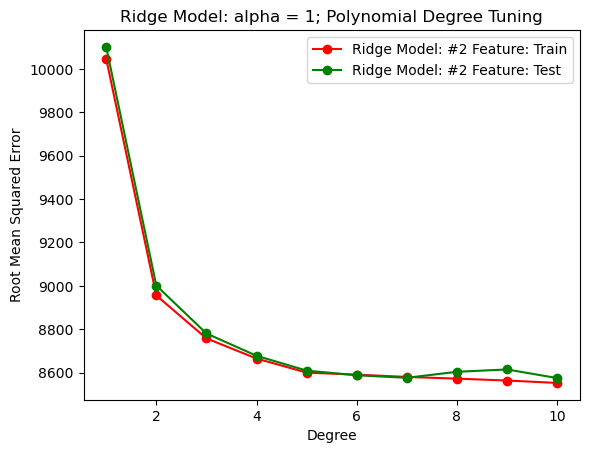

In [90]:

#plot the reusults comparing MAE for different models 
degree = np.linspace(1,10,10)

plt.plot(degree, rmse_ridge_Poly_train, marker='o', linestyle='-', color='r', label='Ridge Model: #2 Feature: Train')
plt.plot(degree, rmse_ridge_Poly_test, marker='o', linestyle='-', color='g', label='Ridge Model: #2 Feature: Test')


plt.xlabel('Degree')
plt.ylabel('Root Mean Squared Error')
plt.title('Ridge Model: alpha = 1; Polynomial Degree Tuning')
plt.legend()
plt.show()

### Ridge Regression: Polynomial Degree: 4; Hyperparameter Tuning
- From the graph above we can choose degree = 4 as the polynomial order. It is a good trade off between complexity and accuracy
- Next step is to find the best hyper parameter for this case

In [92]:
#Split data into train and test data set
X = model1_df.drop('price', axis = 1)
y = model1_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

#aplha value sweep
alphas = [0.001, 1.0, 10.0, 100.0,1000,10000]
coef_list = []
rmse_ridge_train = []
rmse_ridge_test = []

for alpha in alphas:
    scaled_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 4, include_bias = True)),
                      ('scaler', StandardScaler()),
                     ('ridge', Ridge(alpha=alpha))]).fit(X_train, y_train)    
    train_preds = scaled_pipe.predict(X_train)
    test_preds = scaled_pipe.predict(X_test)
    rmse_ridge_train.append(np.sqrt(mean_squared_error(y_train, train_preds)))
    rmse_ridge_test.append(np.sqrt(mean_squared_error(y_test, test_preds)))
    coef_list.append(list(scaled_pipe.named_steps['ridge'].coef_))

print("Alpha:", alphas)
print("Train RMSE:", rmse_ridge_train)
print("Test RMSE:", rmse_ridge_test)
#print("Coefficients:", coef_list)

Alpha: [0.001, 1.0, 10.0, 100.0, 1000, 10000]
Train RMSE: [8519.599727123212, 8664.946206804345, 8720.269436519951, 8962.68327029785, 9192.806337560916, 9337.855620864628]
Test RMSE: [8557.644275273195, 8677.721622638659, 8750.9158476998, 8988.68012320909, 9229.330366538183, 9370.892467329742]


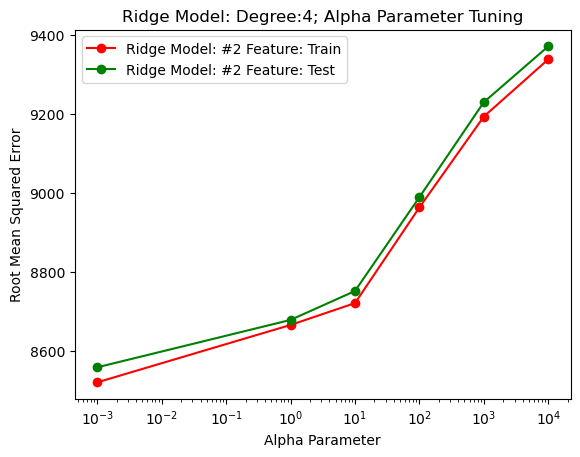

In [93]:
#Plot alpha Vs RMSE

plt.semilogx(alphas, rmse_ridge_train, marker='o', linestyle='-', color='r', label='Ridge Model: #2 Feature: Train')
plt.semilogx(alphas, rmse_ridge_test, marker='o', linestyle='-', color='g', label='Ridge Model: #2 Feature: Test')


plt.xlabel('Alpha Parameter')
plt.ylabel('Root Mean Squared Error')
plt.title('Ridge Model: Degree:4; Alpha Parameter Tuning')
plt.legend()
plt.show()

### Verify Hyper Parameter search using Gridsearch CV function
- Best Alpha is 0.001, which is what we see in the graph above as well
- To avoid overfitting, alpha of 1 will be used for the final model comparison

In [95]:
X = model1_df.drop('price', axis = 1)
y = model1_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0,10000.0]}


pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])
scaled_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 4, include_bias = True)),
                        ('scaler', StandardScaler()),
                        ('ridge', Ridge())])   
param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0,10000.0]}
grid_2 = GridSearchCV(scaled_pipe, param_grid=param_dict)
grid_2.fit(X_train, y_train)
train_preds = grid_2.predict(X_train)
test_preds = grid_2.predict(X_test)
model_ridge_grid_train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
model_ridge_grid_test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
model_ridge_best_alpha = grid_2.best_params_


# Print data
print(f'Train RMSE: {model_ridge_grid_train_rmse}')
print(f'Test RMSE: {model_ridge_grid_test_rmse}')
print(f'Best Alpha: {list(model_ridge_best_alpha.values())[0]}')


Train RMSE: 8519.599727123212
Test RMSE: 8557.644275273195
Best Alpha: 0.001


### Compare train data and predicted data for alpha = 1 and degree = 4
- The RMSE is ~8664. The median values is ~12000.
- The plot of prediction Vs raw data for both train and test data demonstrate the delta between the two values

In [97]:
X = model1_df.drop('price', axis = 1)
y = model1_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
alphas = [1]
coef_list = []
rmse_ridge_train = []
rmse_ridge_test = []

for alpha in alphas:
    scaled_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 4, include_bias = True)),
                          ('scaler', StandardScaler()),
                         ('ridge', Ridge(alpha=alpha))]).fit(X_train, y_train)    
    train_preds = scaled_pipe.predict(X_train)
    test_preds = scaled_pipe.predict(X_test)
    rmse_ridge_train.append(np.sqrt(mean_squared_error(y_train, train_preds)))
    rmse_ridge_test.append(np.sqrt(mean_squared_error(y_test, test_preds)))
    coef_list.append(list(scaled_pipe.named_steps['ridge'].coef_))

print("Alpha:", alphas)
print("Train RMSE:", rmse_ridge_train)
print("Test RMSE:", rmse_ridge_test)
print("Coefficients:", coef_list)

Alpha: [1]
Train RMSE: [8664.946206804345]
Test RMSE: [8677.721622638659]
Coefficients: [[0.0, 31975.315083372938, -131601.07563927976, -65055.01147751595, 11533.38041865455, -52945.63460135193, 8772.9461019902, 10409.292302923852, -12732.373064196681, 40227.234811985174, 17105.931874407386, -44830.466340661085, 80754.40629151212, -40527.381063606976, 147682.45849298427]]


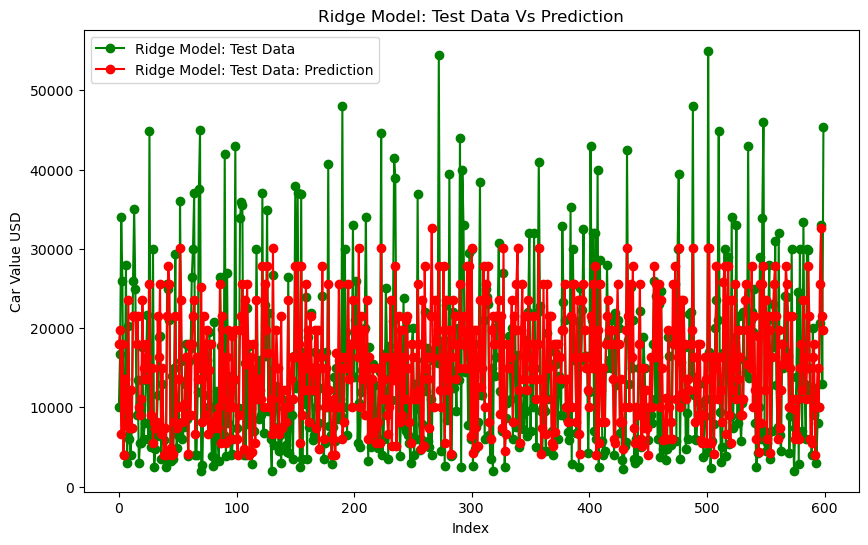

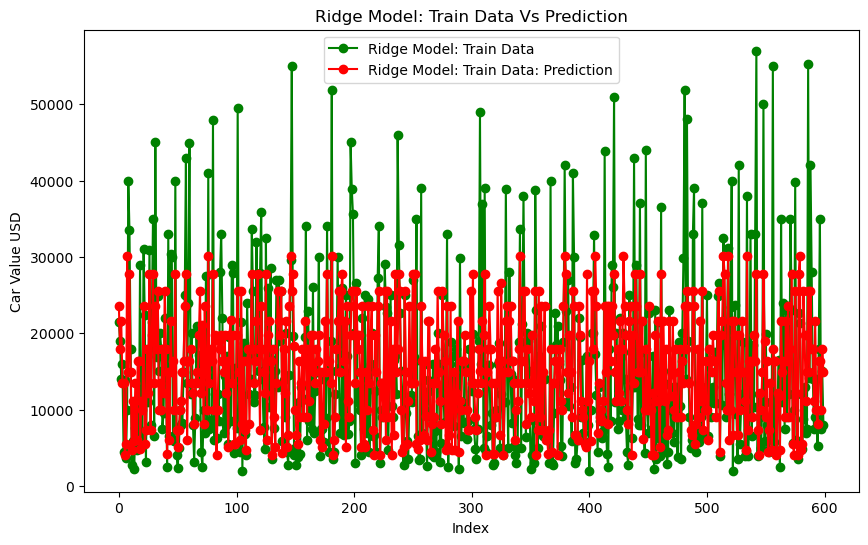

In [98]:
plt.figure(figsize=(10,6))
plt.plot(y_test.reset_index()['price'][0:600], marker='o', linestyle='-', color='g', label='Ridge Model: Test Data')
plt.plot(preds_test[0:600], marker='o', linestyle='-', color='r', label='Ridge Model: Test Data: Prediction')

plt.xlabel('Index')
plt.ylabel('Car Value USD')
plt.title('Ridge Model: Test Data Vs Prediction')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(y_train.reset_index()['price'][0:600], marker='o', linestyle='-', color='g', label='Ridge Model: Train Data')
plt.plot(preds_train[0:600], marker='o', linestyle='-', color='r', label='Ridge Model: Train Data: Prediction')

plt.xlabel('Index')
plt.ylabel('Car Value USD')
plt.title('Ridge Model: Train Data Vs Prediction')
plt.legend()
plt.show()

### Ridge Regression Conlcusion:
- Ridge Regression with two features, odometer and year with polynomial feature: 4 and alpha parameter of 0.001 gave the best mse
- Alpha parameter of 0.001 showed best mse. To avoid overfitting alpha of 1 was chosen 

### Lasso Regression: Polynomial Tuning
- For alpha = 1, 10 , 100, the lasso model did not converge. (Not shown here)
- At alpha = 1000, the model converged.
- The mse at alpha = 1000, is worse than that for Ridge and Linear Regression model

In [101]:
#Split the data between Train and Test Data Set
X = model1_df.drop('price', axis = 1)
y = model1_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

coef_list = []
rmse_lasso_Poly_train = []
rmse_lasso_Poly_test = []

for i in range(1, 11):
    scaled_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = i, include_bias = True)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 42, alpha=1000))]).fit(X_train, y_train)
    train_preds = scaled_pipe.predict(X_train)
    test_preds = scaled_pipe.predict(X_test)
    rmse_lasso_Poly_train.append(np.sqrt(mean_squared_error(y_train, train_preds)))
    rmse_lasso_Poly_test.append(np.sqrt(mean_squared_error(y_test, test_preds)))
    #coef_list.append(list(scaled_pipe.named_steps['Lasso'].coef_))

print("Alpha:", alphas)
print("Lasso Model: Train RMSE:", rmse_ridge_train)
print("Lasso Model: Test RMSE:", rmse_ridge_test)


Alpha: [1]
Lasso Model: Train RMSE: [8664.946206804345]
Lasso Model: Test RMSE: [8677.721622638659]


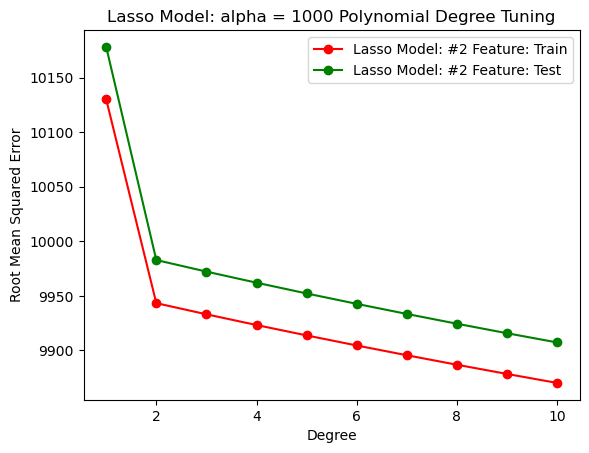

In [102]:
#Lasso model polynomial degree tuning
degree = np.linspace(1,10,10)

plt.plot(degree, rmse_lasso_Poly_train, marker='o', linestyle='-', color='r', label='Lasso Model: #2 Feature: Train')
plt.plot(degree, rmse_lasso_Poly_test, marker='o', linestyle='-', color='g', label='Lasso Model: #2 Feature: Test')


plt.xlabel('Degree')
plt.ylabel('Root Mean Squared Error')
plt.title('Lasso Model: alpha = 1000 Polynomial Degree Tuning')
plt.legend()
plt.show()

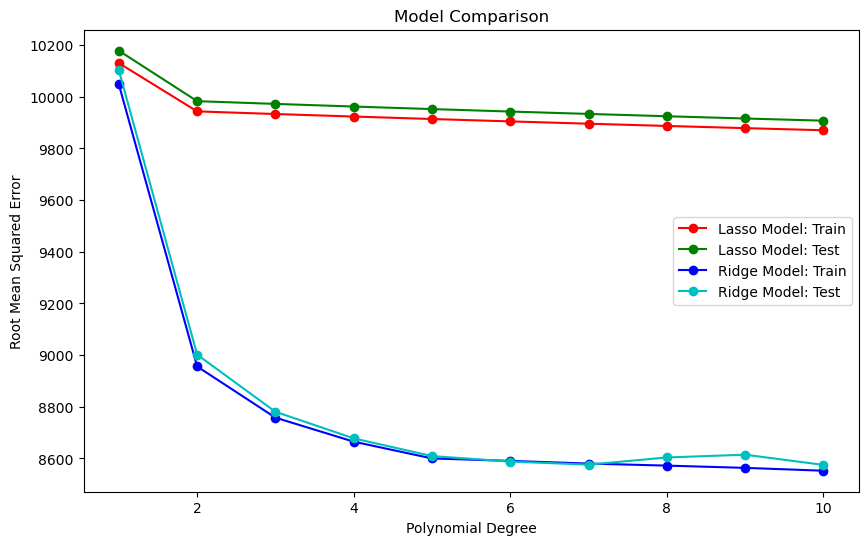

In [103]:
#Comparison between lasso and Ridge
plt.figure(figsize=(10,6))

plt.plot(degree, rmse_lasso_Poly_train, marker='o', linestyle='-', color='r', label='Lasso Model: Train')
plt.plot(degree, rmse_lasso_Poly_test, marker='o', linestyle='-', color='g', label='Lasso Model: Test')


plt.plot(degree, rmse_ridge_Poly_train, marker='o', linestyle='-', color='b', label='Ridge Model: Train')
plt.plot(degree, rmse_ridge_Poly_test, marker='o', linestyle='-', color='c', label='Ridge Model: Test')

#plt.plot(degree, model_2feature_Poly_train_mse, marker='o', linestyle='-', color='m', label='Linear Regression: Train')
#plt.plot(degree, model_2feature_Poly_test_mse, marker='o', linestyle='-', color='y', label='Linear Regression: Test')

plt.xlabel('Polynomial Degree')
plt.ylabel('Root Mean Squared Error')
plt.title('Model Comparison')
plt.legend()
plt.show()

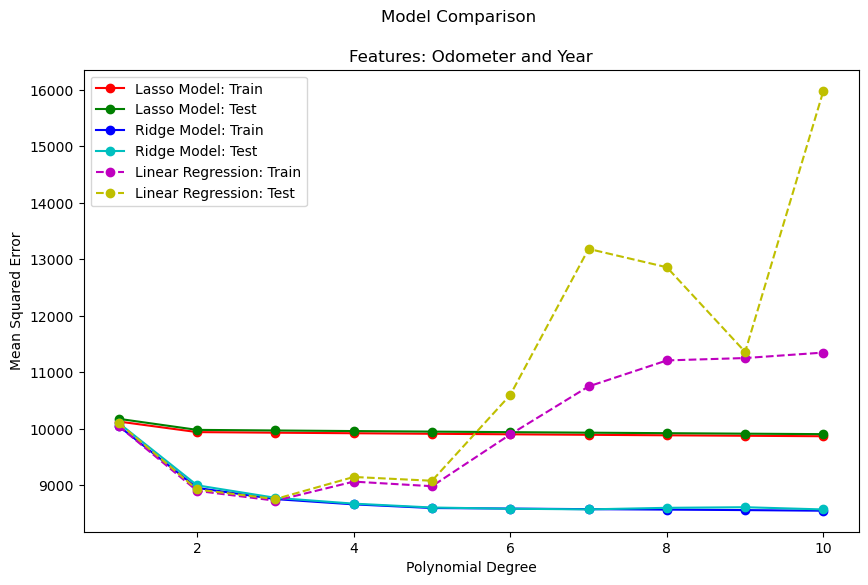

In [104]:
#Comparison between lasso, Ridge and Linear Regression

plt.figure(figsize=(10,6))

plt.plot(degree, rmse_lasso_Poly_train, marker='o', linestyle='-', color='r', label='Lasso Model: Train')
plt.plot(degree, rmse_lasso_Poly_test, marker='o', linestyle='-', color='g', label='Lasso Model: Test')

plt.plot(degree, rmse_ridge_Poly_train, marker='o', linestyle='-', color='b', label='Ridge Model: Train')
plt.plot(degree, rmse_ridge_Poly_test, marker='o', linestyle='-', color='c', label='Ridge Model: Test')

plt.plot(degree, model_2feature_Poly_train_rmse, marker='o', linestyle='--', color='m', label='Linear Regression: Train')
plt.plot(degree, model_2feature_Poly_test_rmse, marker='o', linestyle='--', color='y', label='Linear Regression: Test')

plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.suptitle('Model Comparison')
plt.title('Features: Odometer and Year')
plt.legend()
plt.show()

### Model Comparison

- Graph above indicates that the Ridge regression with polynomial feature: 3 and Linear Regression with polynomial feature: 3 both have similar RMSE
- For Linear Regression, we can see that as the model complexity increases the overfitting increases and thus the RMSE increass. We also see that due to overfitting the test data shows poor results compared to the train data


### Model#2: Features chosen: #3
- The critical parameters that will influence the cost of the car are
  1. Year
  2. Odometer
  3. Manufacturer: One Hot Encoding
- The best RMSE is extremely large: 6747


In [107]:
model2_df = vehicle_df[['price', 'odometer', 'year','manufacturer']]
model2_df = model2_df.dropna() 
model2_df = model2_df.drop_duplicates()
dummies = pd.get_dummies(model2_df[['manufacturer']])
model2_df = pd.concat([model2_df, dummies], axis=1)
model2_df = model2_df.drop('manufacturer',axis = 1)
#Remove outliers from Price data
model2_df = remove_outliers_iqr(model2_df,'price')
#Remove outliers from odometer data
model2_df = model2_df[model2_df['odometer'] < 0.3e7]
model2_df = model2_df[model2_df['odometer'] > 100]
model2_df

price  odometer    year  manufacturer_acura  manufacturer_alfa-romeo  \
27      33590   57923.0  2014.0               False                    False   
28      22590   71229.0  2010.0               False                    False   
29      39590   19160.0  2020.0               False                    False   
30      30990   41124.0  2017.0               False                    False   
31      15000  128000.0  2013.0               False                    False   
...       ...       ...     ...                 ...                      ...   
426808  18000  130000.0  2005.0               False                    False   
426809  18000  114400.0  1990.0               False                    False   
426819  21990   26599.0  2016.0               False                    False   
426831   9800  115000.0  1985.0               False                    False   
426833   6800   69550.0  1997.0               False                    False   

        manufacturer_aston-martin  manufacturer_audi  manufacturer_bmw  \
27                          False              False             False   
28                          False              False             False   
29                          False              False             False   
30                          False              False             False   
31                          False              False             False   
...                           ...                ...               ...   
426808                      False              False             False   
426809                      False              False             False   
426819                      False              False              True   
426831                      False              False             False   
426833                      False              False             False   

        manufacturer_buick  manufacturer_cadillac  ...  manufacturer_pontiac  \
27                   False                  False  ...                 False   
28                   False                  False  ...                 False   
29                   False                  False  ...                 False   
30                   False                  False  ...                 False   
31                   False                  False  ...                 False   
...                    ...                    ...  ...                   ...   
426808               False                  False  ...                 False   
426809               False                  False  ...                 False   
426819               False                  False  ...                 False   
426831               False                  False  ...                 False   
426833               False                  False  ...                 False   

        manufacturer_porsche  manufacturer_ram  manufacturer_rover  \
27                     False             False               False   
28                     False             False               False   
29                     False             False               False   
30                     False             False               False   
31                     False             False               False   
...                      ...               ...                 ...   
426808                 False             False               False   
426809                 False             False               False   
426819                 False             False               False   
426831                 False             False               False   
426833                 False             False               False   

        manufacturer_saturn  manufacturer_subaru  manufacturer_tesla  \
27                    False                False               False   
28                    False                False               False   
29                    False                False               False   
30                    False                False               False

In [108]:
#Split data into test and train
X = model2_df.drop('price', axis = 1)
y = model2_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

rmse_model2_Poly_train = []
rmse_model2_Poly_test = []

#Pipe line for Linear Regression for Model 2
for i in range(1, 3):
    pipe = Pipeline([('quad_features', PolynomialFeatures(degree = i, include_bias = True)), ('quad_model', LinearRegression())])
    pipe.fit(X_train, y_train)
    preds_train = pipe.predict(X_train)
    preds_test = pipe.predict(X_test)
    rmse_model2_Poly_train.append(np.sqrt(mean_squared_error(y_train, preds_train)))
    rmse_model2_Poly_test.append(np.sqrt(mean_squared_error(y_test, preds_test)))
    

print('RMSE Model#2 Train: ',rmse_model2_Poly_train)
print('RMSE Model#2 Test', rmse_model2_Poly_test)



RMSE Model#2 Train:  [7813.786248391861, 6582.679653721268]
RMSE Model#2 Test [7802.3645754851905, 6590.534985195879]


### Model#3 with 3 features
1. Year
2. Odomoter
3. Condition: One Hot Encoding
4. RMSE: 6747


In [110]:
model3_df = vehicle_df[['price', 'odometer', 'year','condition']]
model3_df = model3_df.dropna()
model3_df = model3_df.drop_duplicates()
dummies = pd.get_dummies(model3_df[['condition']])
model3_df = pd.concat([model3_df,dummies],axis=1)
model3_df = model3_df.drop('condition',axis=1)
#Remove outliers from Price data
model3_df = remove_outliers_iqr(model3_df,'price')
#Remove outliers from odometer data
model3_df = model3_df[model3_df['odometer'] < 0.3e7]
model3_df = model3_df[model3_df['odometer'] > 100]
model3_df

price  odometer    year  condition_excellent  condition_fair  \
27      33590   57923.0  2014.0                False           False   
28      22590   71229.0  2010.0                False           False   
30      30990   41124.0  2017.0                False           False   
31      15000  128000.0  2013.0                 True           False   
32      27990   68696.0  2012.0                False           False   
...       ...       ...     ...                  ...             ...   
426815   5000  170000.0  1996.0                 True           False   
426819  21990   26599.0  2016.0                False           False   
426831   9800  115000.0  1985.0                False           False   
426833   6800   69550.0  1997.0                False           False   
426838  21900   11065.0  1920.0                False           False   

        condition_good  condition_like new  condition_new  condition_salvage  
27                True               False          False              False  
28                True               False          False              False  
30                True               False          False              False  
31               False               False          False              False  
32                True               False          False              False  
...                ...                 ...            ...                ...  
426815           False               False          False              False  
426819            True               False          False              False  
426831           False                True          False              False  
426833            True               False          False              False  
426838            True               False          False              False  

[121945 rows x 9 columns]

### Linear Regression for different degree of Polynomial Features: Model#3


RMSE Model#3 Train: [7642.965318933917, 6747.425908852429, 8120.221942943262, 6868.895906226145, 7127.015439520118]
RMSE Model#3 Test: [7754.287108270636, 6820.162477909929, 19926.741297129534, 8008.556343836071, 121791.98080839087]


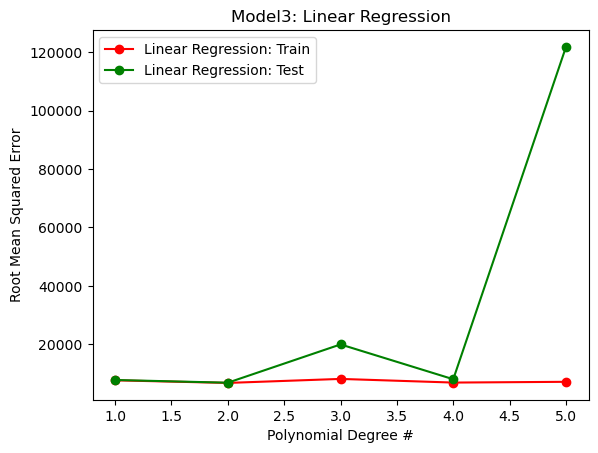

In [112]:
### Linear Regression for different degree of Polynomial Features: Model#3
#Split data between train and test data set
X = model3_df.drop('price', axis = 1)
y = model3_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
rmse_model3_Poly_train = []
rmse_model3_Poly_test = []

#Linear Regression for different degree of Polynomial Features

for i in range(1, 6):
    pipe = Pipeline([('quad_features', PolynomialFeatures(degree = i, include_bias = True)), ('quad_model', LinearRegression())])
    pipe.fit(X_train, y_train)
    preds_train = pipe.predict(X_train)
    preds_test = pipe.predict(X_test)
    rmse_model3_Poly_train.append(np.sqrt(mean_squared_error(y_train, preds_train)))
    rmse_model3_Poly_test.append(np.sqrt(mean_squared_error(y_test, preds_test)))
    

print('RMSE Model#3 Train:', rmse_model3_Poly_train)
print('RMSE Model#3 Test:', rmse_model3_Poly_test)

degree = np.linspace(1,5,5)
plt.plot(degree, rmse_model3_Poly_train, marker='o', linestyle='-', color='r', label='Linear Regression: Train')
plt.plot(degree, rmse_model3_Poly_test, marker='o', linestyle='-', color='g', label='Linear Regression: Test')

plt.xlabel('Polynomial Degree #')
plt.ylabel('Root Mean Squared Error')
plt.title('Model3: Linear Regression')
plt.legend()
plt.show()

### Ridge Regression for Model3; alpha = 1


Ridge Model3: Train RMSE: [7642.965319013669, 6826.572113209644, 6624.81294188708]
Ridge Model3: Test RMSE: [7754.285729195414, 6896.334387971553, 6728.3865099666045]


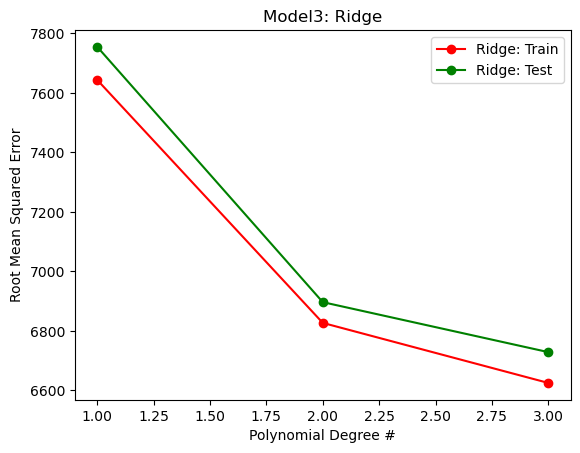

In [114]:
### Ridge Regression for Model3; alpha = 1
#Split data into testing and training data set
X = model3_df.drop('price', axis = 1)
y = model3_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
coef_list_Poly = []
model3_rmse_ridge_Poly_train = []
model3_rmse_ridge_Poly_test = []

#Pipleline for Ridge regression with standard scalar and Polynomial features degree tuning
for i in range(1, 4):
    scaled_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = i, include_bias = True)),
                      ('scaler', StandardScaler()),
                     ('ridge', Ridge())]).fit(X_train, y_train)
    train_preds = scaled_pipe.predict(X_train)
    test_preds = scaled_pipe.predict(X_test)
    model3_rmse_ridge_Poly_train.append(np.sqrt(mean_squared_error(y_train, train_preds)))
    model3_rmse_ridge_Poly_test.append(np.sqrt(mean_squared_error(y_test, test_preds)))
    coef_list_Poly.append(list(scaled_pipe.named_steps['ridge'].coef_))

print("Ridge Model3: Train RMSE:", model3_rmse_ridge_Poly_train)
print("Ridge Model3: Test RMSE:", model3_rmse_ridge_Poly_test)
#print("Coefficients:", coef_list_Poly)

degree = np.linspace(1,3,3)
plt.plot(degree, model3_rmse_ridge_Poly_train, marker='o', linestyle='-', color='r', label='Ridge: Train')
plt.plot(degree, model3_rmse_ridge_Poly_test, marker='o', linestyle='-', color='g', label='Ridge: Test')

plt.xlabel('Polynomial Degree #')
plt.ylabel('Root Mean Squared Error')
plt.title('Model3: Ridge')
plt.legend()
plt.show()

### Ridge Model: Hyper Parameter Tuning

In [116]:
### Ridge Model3: Hyper Parameter Tuning
#Split data into testing and training data set
X = model3_df.drop('price', axis = 1)
y = model3_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0,10000.0]}


scaled_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = True)),
                        ('scaler', StandardScaler()),
                        ('ridge', Ridge())])   
param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0,10000.0]}
grid_2 = GridSearchCV(scaled_pipe, param_grid=param_dict)
grid_2.fit(X_train, y_train)
train_preds = grid_2.predict(X_train)
test_preds = grid_2.predict(X_test)

model3_ridge_grid_train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
model3_ridge_grid_test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
model3_ridge_best_alpha = grid_2.best_params_


# Print Data
print(f'Ridge Model3: Train RMSE: {model3_ridge_grid_train_rmse}')
print(f'Ridge Model3: Test RMSE: {model3_ridge_grid_test_rmse}')
print(f'Best Alpha: {list(model3_ridge_best_alpha.values())[0]}')


Ridge Model3: Train RMSE: 6572.060975571192
Ridge Model3: Test RMSE: 6654.401660366021
Best Alpha: 0.001


### Lasso Regression for Model3

Alpha: 1000
Lasso Model3: Train RMSE: [7806.246389080532, 7798.79458946343, 7791.399497324473]
Lasso Model3: Test RMSE: [7884.686489528995, 7877.3061350354, 7869.975616381814]


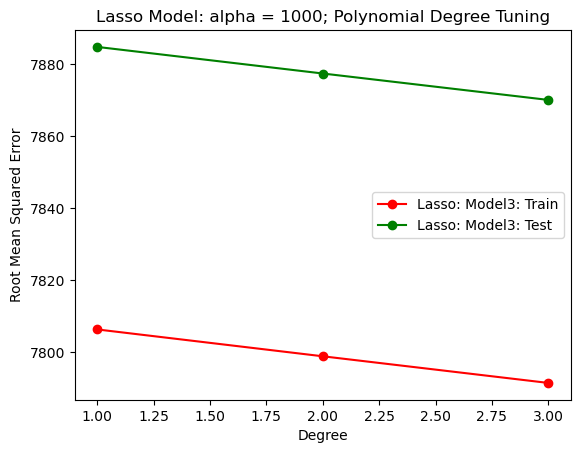

In [118]:
### Lasso Regression for Model3
#Split data into testing and training data set
X = model3_df.drop('price', axis = 1)
y = model3_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
coef_list = []
model3_rmse_lasso_Poly_train = []
model3_rmse_lasso_Poly_test = []
alpha = 1000

#Pipeline for Lasso Regression with Standard scalar and Polynomial Features
for i in range(1, 4):
    scaled_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = i, include_bias = True)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 42, alpha=alpha))]).fit(X_train, y_train)
    train_preds = scaled_pipe.predict(X_train)
    test_preds = scaled_pipe.predict(X_test)
    model3_rmse_lasso_Poly_train.append(np.sqrt(mean_squared_error(y_train, train_preds)))
    model3_rmse_lasso_Poly_test.append(np.sqrt(mean_squared_error(y_test, test_preds)))
    #coef_list.append(list(scaled_pipe.named_steps['Lasso'].coef_))

print("Alpha:", alpha)
print("Lasso Model3: Train RMSE:", model3_rmse_lasso_Poly_train)
print("Lasso Model3: Test RMSE:", model3_rmse_lasso_Poly_test)
#Plot data
degree = np.linspace(1,3,3)
plt.plot(degree, model3_rmse_lasso_Poly_train, marker='o', linestyle='-', color='r', label='Lasso: Model3: Train')
plt.plot(degree, model3_rmse_lasso_Poly_test, marker='o', linestyle='-', color='g', label='Lasso: Model3: Test')


plt.xlabel('Degree')
plt.ylabel('Root Mean Squared Error')
plt.title('Lasso Model: alpha = 1000; Polynomial Degree Tuning')
plt.legend()
plt.show()

### Model3: Linear Regression; Polynomial deree =3; Polynomial Sweep with PCA 

In [120]:
### Model3: Linear Regression; Polynomial deree =3; Polynomial Sweep with PCA 
#Split data into testing and training data set
X = model3_df.drop('price', axis = 1)
y = model3_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
coef_list = []
model2_rmse_Lin_pca_train = []
model2_rmse_Lin_pca_test = []

#Pipeline for linear regression with PCA
for i in range(1, 4):
    scaled_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = i, include_bias = True)),
                            ('pca',PCA(random_state = 42)),
                            ('scaler', StandardScaler()),
                            ('model', LinearRegression())]).fit(X_train, y_train)
    train_preds = scaled_pipe.predict(X_train)
    test_preds = scaled_pipe.predict(X_test)
    model2_rmse_Lin_pca_train.append(np.sqrt(mean_squared_error(y_train, train_preds)))
    model2_rmse_Lin_pca_test.append(np.sqrt(mean_squared_error(y_test, test_preds)))
    #coef_list.append(list(scaled_pipe.named_steps['Lasso'].coef_))

print("Linear Regression: Train RMSE:", model2_rmse_Lin_pca_train)
print("Linear Regression: Test RMSE:", model2_rmse_Lin_pca_test)


Linear Regression: Train RMSE: [7642.967452426323, 6747.5067414499035, 6757.544491074332]
Linear Regression: Test RMSE: [7754.250801114051, 6820.584808868548, 9549.744890451557]


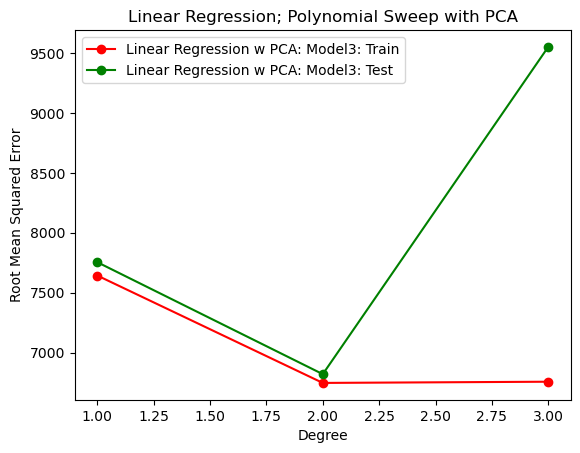

In [121]:
#Plot the data
degree = np.linspace(1,3,3)
plt.plot(degree, model2_rmse_Lin_pca_train, marker='o', linestyle='-', color='r', label='Linear Regression w PCA: Model3: Train')
plt.plot(degree, model2_rmse_Lin_pca_test, marker='o', linestyle='-', color='g', label='Linear Regression w PCA: Model3: Test')


plt.xlabel('Degree')
plt.ylabel('Root Mean Squared Error')
plt.title('Linear Regression; Polynomial Sweep with PCA')
plt.legend()
plt.show()

### Model#4 
1. Year
2. Odomoter
3. Fuel: One Hot Encoding
4. RMSE: 7051

In [124]:
model4_df = vehicle_df[['price', 'odometer', 'year','fuel']]
model4_df = model4_df.dropna()
model4_df = model4_df.drop_duplicates()
dummies = pd.get_dummies(model4_df[['fuel']])
model4_df = pd.concat([model4_df,dummies],axis=1)
model4_df = model4_df.drop('fuel',axis=1)
#Remove outliers from Price data
model4_df = remove_outliers_iqr(model4_df,'price')
#Remove outliers from odometer data
model4_df = model4_df[model4_df['odometer'] < 0.3e7]
model4_df = model4_df[model4_df['odometer'] > 100]
model4_df

price  odometer    year  fuel_diesel  fuel_electric  fuel_gas  \
27      33590   57923.0  2014.0        False          False      True   
28      22590   71229.0  2010.0        False          False      True   
29      39590   19160.0  2020.0        False          False      True   
30      30990   41124.0  2017.0        False          False      True   
31      15000  128000.0  2013.0        False          False      True   
...       ...       ...     ...          ...            ...       ...   
426819  21990   26599.0  2016.0        False          False     False   
426831   9800  115000.0  1985.0        False          False      True   
426833   6800   69550.0  1997.0        False          False      True   
426838  21900   11065.0  1920.0        False          False      True   
426846  41999  126000.0  2015.0        False          False      True   

        fuel_hybrid  fuel_other  
27            False       False  
28            False       False  
29            False       False  
30            False       False  
31            False       False  
...             ...         ...  
426819        False        True  
426831        False       False  
426833        False       False  
426838        False       False  
426846        False       False  

[190767 rows x 8 columns]

### Linear Regression for different degree of Polynomial Features: Model #4


[8296.98776991108, 7150.349381973577, 7051.807260955476]
[8276.9319325305, 7111.6399429410685, 7007.385733014118]


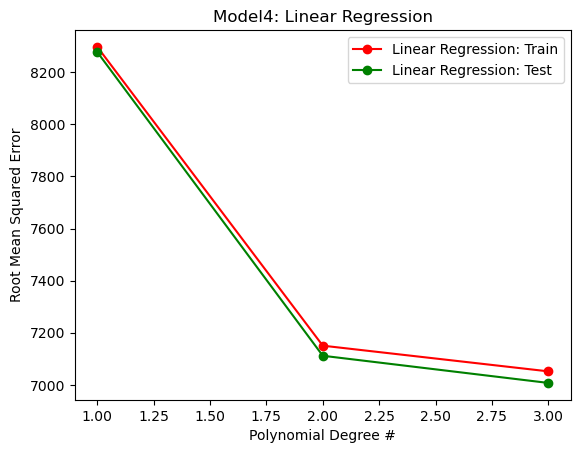

In [126]:
### Linear Regression for different degree of Polynomial Features: Model #4
#Split data between train and test data set
X = model4_df.drop('price', axis = 1)
y = model4_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
rmse_model4_Poly_train = []
rmse_model4_Poly_test = []

#Linear Regression for different degree of Polynomial Features

for i in range(1, 4):
    pipe = Pipeline([('quad_features', PolynomialFeatures(degree = i, include_bias = True)), ('quad_model', LinearRegression())])
    pipe.fit(X_train, y_train)
    preds_train = pipe.predict(X_train)
    preds_test = pipe.predict(X_test)
    rmse_model4_Poly_train.append(np.sqrt(mean_squared_error(y_train, preds_train)))
    rmse_model4_Poly_test.append(np.sqrt(mean_squared_error(y_test, preds_test)))
    

print(rmse_model4_Poly_train)
print(rmse_model4_Poly_test)

degree = np.linspace(1,3,3)
plt.plot(degree, rmse_model4_Poly_train, marker='o', linestyle='-', color='r', label='Linear Regression: Train')
plt.plot(degree, rmse_model4_Poly_test, marker='o', linestyle='-', color='g', label='Linear Regression: Test')

plt.xlabel('Polynomial Degree #')
plt.ylabel('Root Mean Squared Error')
plt.title('Model4: Linear Regression')
plt.legend()
plt.show()

### Ridge Regression for Model4; alpha = 1


In [128]:
### Ridge Regression for Model4; alpha = 1
#Split data into testing and training data set
X = model4_df.drop('price', axis = 1)
y = model4_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
coef_list_Poly = []
model4_rmse_ridge_Poly_train = []
model4_rmse_ridge_Poly_test = []

#Pipleline for Ridge regression with standard scalar and Polynomial features degree tuning
for i in range(1, 4):
    scaled_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = i, include_bias = True)),
                      ('scaler', StandardScaler()),
                     ('ridge', Ridge())]).fit(X_train, y_train)
    train_preds = scaled_pipe.predict(X_train)
    test_preds = scaled_pipe.predict(X_test)
    model4_rmse_ridge_Poly_train.append(np.sqrt(mean_squared_error(y_train, train_preds)))
    model4_rmse_ridge_Poly_test.append(np.sqrt(mean_squared_error(y_test, test_preds)))
    coef_list_Poly.append(list(scaled_pipe.named_steps['ridge'].coef_))

print("Ridge Model4: Train RMSE:", model4_rmse_ridge_Poly_train)
print("Ridge Model4: Test RMSE:", model4_rmse_ridge_Poly_test)
#print("Coefficients:", coef_list_Poly)

Ridge Model4: Train RMSE: [8296.987769980808, 7199.270168986023, 7059.923920932778]
Ridge Model4: Test RMSE: [8276.931473588176, 7168.8838602852165, 7024.287080563226]


### Ridge Model4: Hyper Parameter Tuning

In [130]:
### Ridge Model3: Hyper Parameter Tuning
#Split data into testing and training data set
X = model4_df.drop('price', axis = 1)
y = model4_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0,10000.0]}


scaled_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = True)),
                        ('scaler', StandardScaler()),
                        ('ridge', Ridge())])   
param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0,10000.0]}
grid_2 = GridSearchCV(scaled_pipe, param_grid=param_dict)
grid_2.fit(X_train, y_train)
train_preds = grid_2.predict(X_train)
test_preds = grid_2.predict(X_test)

model4_ridge_grid_train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
model4_ridge_grid_test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
model4_ridge_best_alpha = grid_2.best_params_


# Print Data
print(f'Ridge Model4: Train RMSE: {model4_ridge_grid_train_rmse}')
print(f'Ridge Model4: Test RMSE: {model4_ridge_grid_test_rmse}')
print(f'Best Alpha: {list(model4_ridge_best_alpha.values())[0]}')


Ridge Model4: Train RMSE: 7015.779155132402
Ridge Model4: Test RMSE: 6979.341865745451
Best Alpha: 0.001


### Lasso Regression for Model4

Alpha: 10000
Lasso Model4: Train RMSE: [9631.374618399012, 9631.374618399012, 9631.374618399012]
Lasso Model4: Test RMSE: [9603.708835542519, 9603.708835542519, 9603.708835542519]


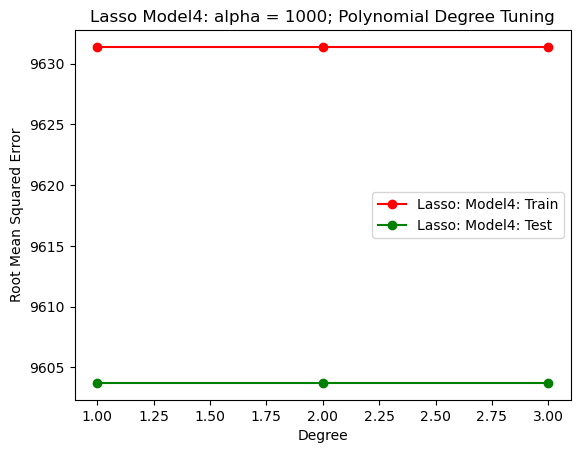

In [132]:
### Lasso Regression for Model4
#Split data into testing and training data set
X = model4_df.drop('price', axis = 1)
y = model4_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
coef_list = []
model4_rmse_lasso_Poly_train = []
model4_rmse_lasso_Poly_test = []
alpha = 10000

#Pipeline for Lasso Regression with Standard scalar and Polynomial Features
for i in range(1, 4):
    scaled_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = i, include_bias = True)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 42, alpha=alpha))]).fit(X_train, y_train)
    train_preds = scaled_pipe.predict(X_train)
    test_preds = scaled_pipe.predict(X_test)
    model4_rmse_lasso_Poly_train.append(np.sqrt(mean_squared_error(y_train, train_preds)))
    model4_rmse_lasso_Poly_test.append(np.sqrt(mean_squared_error(y_test, test_preds)))
    #coef_list.append(list(scaled_pipe.named_steps['Lasso'].coef_))

print("Alpha:", alpha)
print("Lasso Model4: Train RMSE:", model4_rmse_lasso_Poly_train)
print("Lasso Model4: Test RMSE:", model4_rmse_lasso_Poly_test)
#Plot data
degree = np.linspace(1,3,3)
plt.plot(degree, model4_rmse_lasso_Poly_train, marker='o', linestyle='-', color='r', label='Lasso: Model4: Train')
plt.plot(degree, model4_rmse_lasso_Poly_test, marker='o', linestyle='-', color='g', label='Lasso: Model4: Test')


plt.xlabel('Degree')
plt.ylabel('Root Mean Squared Error')
plt.title('Lasso Model4: alpha = 1000; Polynomial Degree Tuning')
plt.legend()
plt.show()

### Model5

In [134]:
model5_df = vehicle_df[['price', 'odometer', 'year','drive']]
model5_df = model5_df.dropna()
model5_df = model5_df.drop_duplicates()
dummies = pd.get_dummies(model5_df[['drive']])
model5_df = pd.concat([model5_df,dummies],axis=1)
model5_df = model5_df.drop('drive',axis=1)
#Remove outliers from Price data
model5_df = remove_outliers_iqr(model5_df,'price')
#Remove outliers from odometer data
model5_df = model5_df[model5_df['odometer'] < 0.3e7]
model5_df = model5_df[model5_df['odometer'] > 100]
model5_df

price  odometer    year  drive_4wd  drive_fwd  drive_rwd
31      15000  128000.0  2013.0      False      False       True
32      27990   68696.0  2012.0       True      False      False
33      34590   29499.0  2016.0       True      False      False
34      35000   43000.0  2019.0       True      False      False
35      29990   17302.0  2016.0       True      False      False
...       ...       ...     ...        ...        ...        ...
426809  18000  114400.0  1990.0       True      False      False
426819  21990   26599.0  2016.0      False      False       True
426831   9800  115000.0  1985.0      False      False       True
426833   6800   69550.0  1997.0      False      False       True
426838  21900   11065.0  1920.0      False      False       True

[141837 rows x 6 columns]

### Model#5
1. Year
2. Odomoter
3. drive: One Hot Encoding
4. RMSE: 6415

In [136]:
model5_df = vehicle_df[['price', 'odometer', 'year','drive']]
model5_df = model5_df.dropna()
model5_df = model5_df.drop_duplicates()
dummies = pd.get_dummies(model5_df[['drive']])
model5_df = pd.concat([model5_df,dummies],axis=1)
model5_df = model5_df.drop('drive',axis=1)
#Remove outliers from Price data
model5_df = remove_outliers_iqr(model5_df,'price')
#Remove outliers from odometer data
model5_df = model5_df[model5_df['odometer'] < 0.3e7]
model5_df = model5_df[model5_df['odometer'] > 100]
model5_df

price  odometer    year  drive_4wd  drive_fwd  drive_rwd
31      15000  128000.0  2013.0      False      False       True
32      27990   68696.0  2012.0       True      False      False
33      34590   29499.0  2016.0       True      False      False
34      35000   43000.0  2019.0       True      False      False
35      29990   17302.0  2016.0       True      False      False
...       ...       ...     ...        ...        ...        ...
426809  18000  114400.0  1990.0       True      False      False
426819  21990   26599.0  2016.0      False      False       True
426831   9800  115000.0  1985.0      False      False       True
426833   6800   69550.0  1997.0      False      False       True
426838  21900   11065.0  1920.0      False      False       True

[141837 rows x 6 columns]

[6558.1504042023835]
[6600.641211631394]
[0.5320897788487366]
[0.5285832192696229]
['1' 'odometer' 'year' 'drive_4wd' 'drive_fwd' 'drive_rwd' 'odometer^2'
 'odometer year' 'odometer drive_4wd' 'odometer drive_fwd'
 'odometer drive_rwd' 'year^2' 'year drive_4wd' 'year drive_fwd'
 'year drive_rwd' 'drive_4wd^2' 'drive_4wd drive_fwd'
 'drive_4wd drive_rwd' 'drive_fwd^2' 'drive_fwd drive_rwd' 'drive_rwd^2']
Selected feature names: ['odometer' 'year' 'drive_fwd' 'odometer^2' 'odometer year' 'year^2']
[ 1.21316136e+00 -4.88653820e+04 -7.69367295e+03  2.63490600e-08
 -6.30653210e-04  1.23489460e+01]


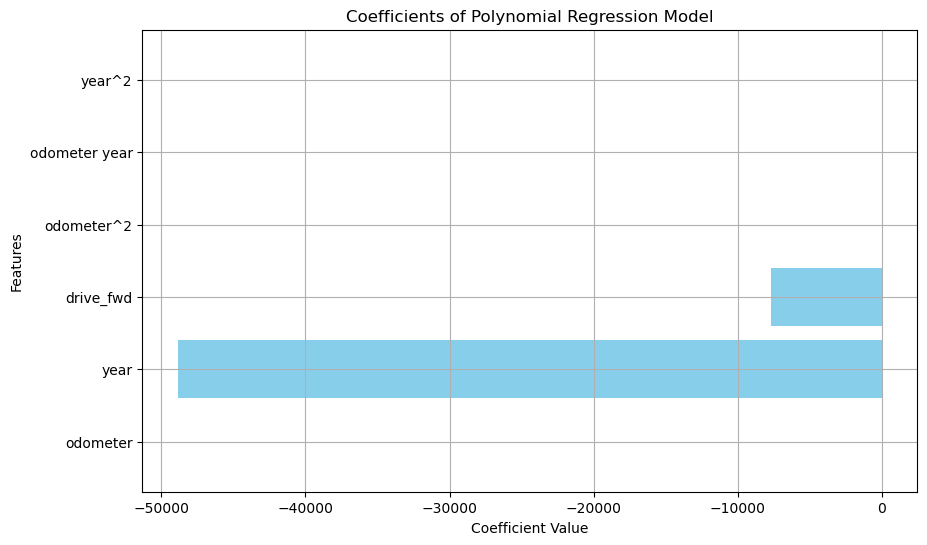

In [137]:
X = model5_df.drop('price', axis = 1)
y = model5_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

rmse_model5_Poly_train = []
rmse_model5_Poly_test = []
r2_model5_Poly_train = []
r2_model5_Poly_test = []

for i in range(2, 3):
    pipe = Pipeline([('quad_features', PolynomialFeatures(degree = i, include_bias = True)), 
                     ('feature_selector', SequentialFeatureSelector(LinearRegression(), n_features_to_select=6, direction='forward')),
                     ('quad_model', LinearRegression())])
    #pipe = Pipeline([('quad_features', PolynomialFeatures(degree = i, include_bias = True)), 
    #                 ('quad_model', LinearRegression())])
    pipe.fit(X_train, y_train)
    preds_train = pipe.predict(X_train)
    preds_test = pipe.predict(X_test)
    rmse_model5_Poly_train.append(np.sqrt(mean_squared_error(y_train, preds_train)))
    rmse_model5_Poly_test.append(np.sqrt(mean_squared_error(y_test, preds_test)))
    r2_model5_Poly_train.append(pipe.score(X_train,y_train))
    r2_model5_Poly_test.append(pipe.score(X_test,y_test))


print(rmse_model5_Poly_train)
print(rmse_model5_Poly_test)
print(r2_model5_Poly_train)
print(r2_model5_Poly_test)

# Get the feature names from PolynomialFeatures
poly_features = pipe.named_steps['quad_features']
feature_names = poly_features.get_feature_names_out(input_features=X.columns)

print(feature_names)

# Get the support mask from SequentialFeatureSelector
sfs = pipe.named_steps['feature_selector']
selected_features_mask = sfs.get_support()

# Get the selected feature names
selected_feature_names = feature_names[selected_features_mask]

print(f'Selected feature names: {selected_feature_names}')

# Get the coefficients from the linear regression model
coefficients = pipe.named_steps['quad_model'].coef_
print(coefficients)
# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.barh(selected_feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Coefficients of Polynomial Regression Model')
plt.grid(True)
plt.show()


### Linear Regression for different degree of Polynomial Features: Model #5

[7642.437824457659, 6516.961404789644, 6415.946814957331]
[7776.623067613211, 6566.912410658893, 6455.610465966234]


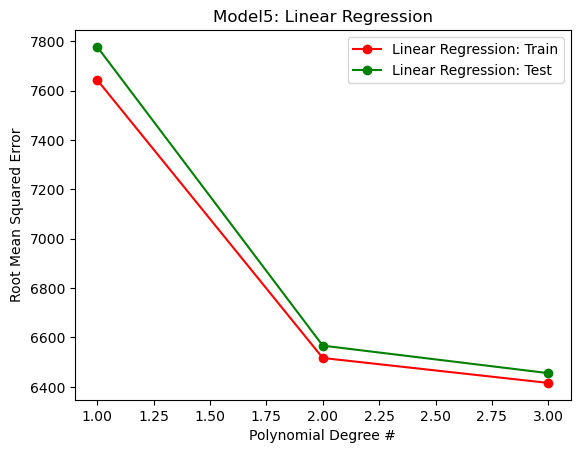

In [139]:
### Linear Regression for different degree of Polynomial Features: Model #5
#Split data between train and test data set
X = model5_df.drop('price', axis = 1)
y = model5_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
rmse_model5_Poly_train = []
rmse_model5_Poly_test = []

#Linear Regression for different degree of Polynomial Features

for i in range(1, 4):
    pipe = Pipeline([('quad_features', PolynomialFeatures(degree = i, include_bias = True)), ('quad_model', LinearRegression())])
    pipe.fit(X_train, y_train)
    preds_train = pipe.predict(X_train)
    preds_test = pipe.predict(X_test)
    rmse_model5_Poly_train.append(np.sqrt(mean_squared_error(y_train, preds_train)))
    rmse_model5_Poly_test.append(np.sqrt(mean_squared_error(y_test, preds_test)))
    

print(rmse_model5_Poly_train)
print(rmse_model5_Poly_test)

degree = np.linspace(1,3,3)
plt.plot(degree, rmse_model5_Poly_train, marker='o', linestyle='-', color='r', label='Linear Regression: Train')
plt.plot(degree, rmse_model5_Poly_test, marker='o', linestyle='-', color='g', label='Linear Regression: Test')

plt.xlabel('Polynomial Degree #')
plt.ylabel('Root Mean Squared Error')
plt.title('Model5: Linear Regression')
plt.legend()
plt.show()

### Model#6
1. Year
2. Odomoter
3. Type: One Hot Encoding
4. RMSE: 6283

In [141]:
model6_df = vehicle_df[['price', 'odometer', 'year','type']]
model6_df = model6_df.dropna()
model6_df = model6_df.drop_duplicates()
dummies = pd.get_dummies(model6_df[['type']])
model6_df = pd.concat([model6_df,dummies],axis=1)
model6_df = model6_df.drop('type',axis=1)
#Remove outliers from Price data
model6_df = remove_outliers_iqr(model6_df,'price')
#Remove outliers from odometer data
model6_df = model6_df[model6_df['odometer'] < 0.3e7]
model6_df = model6_df[model6_df['odometer'] > 100]
model6_df

price  odometer    year  type_SUV  type_bus  type_convertible  \
27      33590   57923.0  2014.0     False     False             False   
28      22590   71229.0  2010.0     False     False             False   
29      39590   19160.0  2020.0     False     False             False   
30      30990   41124.0  2017.0     False     False             False   
31      15000  128000.0  2013.0     False     False             False   
...       ...       ...     ...       ...       ...               ...   
426819  21990   26599.0  2016.0     False     False             False   
426831   9800  115000.0  1985.0     False     False             False   
426833   6800   69550.0  1997.0     False     False              True   
426838  21900   11065.0  1920.0     False     False             False   
426873  30990   15080.0  2018.0     False     False             False   

        type_coupe  type_hatchback  type_mini-van  type_offroad  type_other  \
27           False           False          False         False       False   
28           False           False          False         False       False   
29           False           False          False         False       False   
30           False           False          False         False       False   
31           False           False          False         False       False   
...            ...             ...            ...           ...         ...   
426819       False           False          False         False       False   
426831       False            True          False         False       False   
426833       False           False          False         False       False   
426838       False           False          False         False        True   
426873       False           False          False         False        True   

        type_pickup  type_sedan  type_truck  type_van  type_wagon  
27             True       False       False     False       False  
28             True       False       False     False       False  
29             True       False       False     False       False  
30             True       False       False     False       False  
31            False       False        True     False       False  
...             ...         ...         ...       ...         ...  
426819        False        True       False     False       False  
426831        False       False       False     False       False  
426833        False       False       False     False       False  
426838        False       False       False     False       False  
426873        False       False       False     False       False  

[148897 rows x 16 columns]

### Linear Regression for different degree of Polynomial Features: Model #6

[7637.504118955427, 6306.249311569724, 6283.728003768436]
[7639.507302462408, 6312.2052372970165, 6306.162156388048]


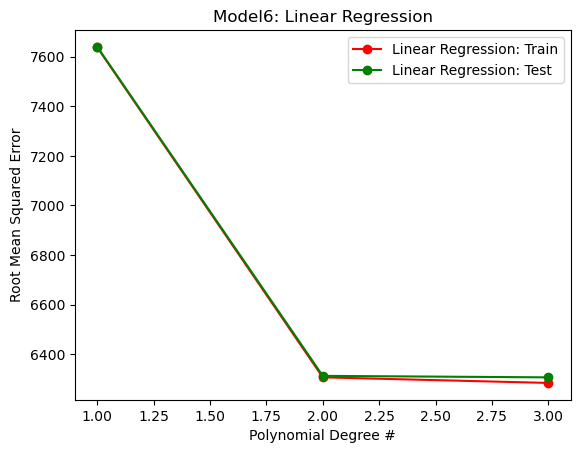

In [143]:
### Linear Regression for different degree of Polynomial Features: Model #6
#Split data between train and test data set
X = model6_df.drop('price', axis = 1)
y = model6_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
rmse_model6_Poly_train = []
rmse_model6_Poly_test = []

#Linear Regression for different degree of Polynomial Features

for i in range(1, 4):
    pipe = Pipeline([('quad_features', PolynomialFeatures(degree = i, include_bias = True)), ('quad_model', LinearRegression())])
    pipe.fit(X_train, y_train)
    preds_train = pipe.predict(X_train)
    preds_test = pipe.predict(X_test)
    rmse_model6_Poly_train.append(np.sqrt(mean_squared_error(y_train, preds_train)))
    rmse_model6_Poly_test.append(np.sqrt(mean_squared_error(y_test, preds_test)))
    

print(rmse_model6_Poly_train)
print(rmse_model6_Poly_test)

degree = np.linspace(1,3,3)
plt.plot(degree, rmse_model6_Poly_train, marker='o', linestyle='-', color='r', label='Linear Regression: Train')
plt.plot(degree, rmse_model6_Poly_test, marker='o', linestyle='-', color='g', label='Linear Regression: Test')

plt.xlabel('Polynomial Degree #')
plt.ylabel('Root Mean Squared Error')
plt.title('Model6: Linear Regression')
plt.legend()
plt.show()

### Model#7
1. Year
2. Odomoter
3. Transmission: One Hot Encoding
4. RMSE: 7410

In [145]:
model7_df = vehicle_df[['price', 'odometer', 'year','transmission']]
model7_df = model7_df.dropna()
model7_df = model7_df.drop_duplicates()
dummies = pd.get_dummies(model7_df[['transmission']])
model7_df = pd.concat([model7_df,dummies],axis=1)
model7_df = model7_df.drop('transmission',axis=1)
#Remove outliers from Price data
model7_df = remove_outliers_iqr(model7_df,'price')
#Remove outliers from odometer data
model7_df = model7_df[model7_df['odometer'] < 0.3e7]
model7_df = model7_df[model7_df['odometer'] > 100]
model7_df

price  odometer    year  transmission_automatic  transmission_manual  \
27      33590   57923.0  2014.0                   False                False   
28      22590   71229.0  2010.0                   False                False   
29      39590   19160.0  2020.0                   False                False   
30      30990   41124.0  2017.0                   False                False   
31      15000  128000.0  2013.0                    True                False   
...       ...       ...     ...                     ...                  ...   
426815   5000  170000.0  1996.0                    True                False   
426819  21990   26599.0  2016.0                    True                False   
426831   9800  115000.0  1985.0                    True                False   
426833   6800   69550.0  1997.0                    True                False   
426838  21900   11065.0  1920.0                   False                 True   

        transmission_other  
27                    True  
28                    True  
29                    True  
30                    True  
31                   False  
...                    ...  
426815               False  
426819               False  
426831               False  
426833               False  
426838               False  

[191634 rows x 6 columns]

### Linear Regression for different degree of Polynomial Features: Model #7


[8465.40167610804, 7515.9096084778475, 7410.154053985328]
[8512.46202319068, 7556.656947410947, 7456.910747690898]


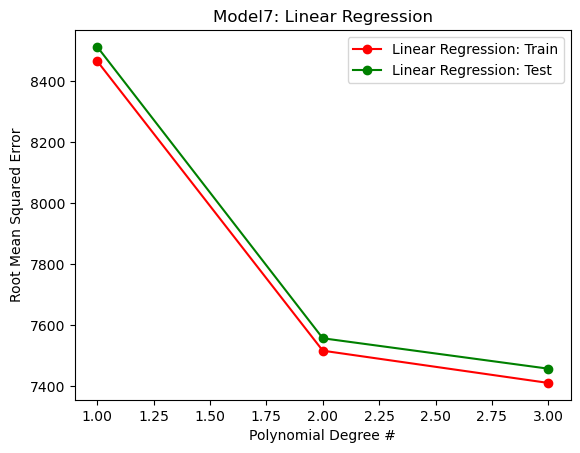

In [147]:
### Linear Regression for different degree of Polynomial Features: Model #7
#Split data between train and test data set
X = model7_df.drop('price', axis = 1)
y = model7_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
rmse_model7_Poly_train = []
rmse_model7_Poly_test = []

#Linear Regression for different degree of Polynomial Features

for i in range(1, 4):
    pipe = Pipeline([('quad_features', PolynomialFeatures(degree = i, include_bias = True)), ('quad_model', LinearRegression())])
    pipe.fit(X_train, y_train)
    preds_train = pipe.predict(X_train)
    preds_test = pipe.predict(X_test)
    rmse_model7_Poly_train.append(np.sqrt(mean_squared_error(y_train, preds_train)))
    rmse_model7_Poly_test.append(np.sqrt(mean_squared_error(y_test, preds_test)))
    

print(rmse_model7_Poly_train)
print(rmse_model7_Poly_test)

degree = np.linspace(1,3,3)
plt.plot(degree, rmse_model7_Poly_train, marker='o', linestyle='-', color='r', label='Linear Regression: Train')
plt.plot(degree, rmse_model7_Poly_test, marker='o', linestyle='-', color='g', label='Linear Regression: Test')

plt.xlabel('Polynomial Degree #')
plt.ylabel('Root Mean Squared Error')
plt.title('Model7: Linear Regression')
plt.legend()
plt.show()

### Model#8
1. Year
2. Odomoter
3. Transmission: One Hot Encoding
4. Condition: One Hot Encoding
5. Type: One Hot Encoding
6. RMSE: 5552

In [149]:
model8_df = vehicle_df[['price', 'odometer', 'year','transmission','condition','type']]
model8_df = model8_df.dropna()
model8_df = model8_df.drop_duplicates()
dummies = pd.get_dummies(model8_df[['condition']])
model8_df = pd.concat([model8_df,dummies],axis=1)
dummies = pd.get_dummies(model8_df[['transmission']])
model8_df = pd.concat([model8_df,dummies],axis=1)
dummies = pd.get_dummies(model8_df[['type']])
model8_df = pd.concat([model8_df,dummies],axis=1)
model8_df = model8_df.drop('transmission',axis=1)
model8_df = model8_df.drop('type',axis=1)
model8_df = model8_df.drop('condition',axis=1)

#Remove outliers from Price data
model8_df = remove_outliers_iqr(model8_df,'price')
#Remove outliers from odometer data
model8_df = model8_df[model8_df['odometer'] < 0.3e7]
model8_df = model8_df[model8_df['odometer'] > 100]
model8_df

price  odometer    year  condition_excellent  condition_fair  \
27      33590   57923.0  2014.0                False           False   
28      22590   71229.0  2010.0                False           False   
30      30990   41124.0  2017.0                False           False   
31      15000  128000.0  2013.0                 True           False   
32      27990   68696.0  2012.0                False           False   
...       ...       ...     ...                  ...             ...   
426819  21990   26599.0  2016.0                False           False   
426831   9800  115000.0  1985.0                False           False   
426833   6800   69550.0  1997.0                False           False   
426838  21900   11065.0  1920.0                False           False   
426873  30990   15080.0  2018.0                False           False   

        condition_good  condition_like new  condition_new  condition_salvage  \
27                True               False          False              False   
28                True               False          False              False   
30                True               False          False              False   
31               False               False          False              False   
32                True               False          False              False   
...                ...                 ...            ...                ...   
426819            True               False          False              False   
426831           False                True          False              False   
426833            True               False          False              False   
426838            True               False          False              False   
426873            True               False          False              False   

        transmission_automatic  ...  type_coupe  type_hatchback  \
27                       False  ...       False           False   
28                       False  ...       False           False   
30                       False  ...       False           False   
31                        True  ...       False           False   
32                       False  ...       False           False   
...                        ...  ...         ...             ...   
426819                    True  ...       False           False   
426831                    True  ...       False            True   
426833                    True  ...       False           False   
426838                   False  ...       False           False   
426873                    True  ...       False           False   

        type_mini-van  type_offroad  type_other  type_pickup  type_sedan  \
27              False         False       False         True       False   
28              False         False       False         True       False   
30              False         False       False         True       False   
31              False         False       False        False       False   
32              False         False       False         True       False   
...               ...           ...         ...          ...         ...   
426819          False         False       False        False        True   
426831          False         False       False        False       False   
426833          False         False       False        False       False   
426838          False         False        True        False       False   
426873          False         False        True        False       False   

        type_truck  type_van  type_wagon  
27           False     False       False  
28           False     False       False  
30           False     False       False  
31            True     False       False  
32           False     False       False  
...            ...       ...         ...  
426819       False     False       False  
426831       False     False       False  
426833       False     False       False  
426838       False     False      

RMSE Model#8 Train: [6735.0919526738935, 5552.3726057363865, 5846.981228896381]
RMSE Model#8 Test [6689.0098256149, 5622.803950372725, 7502.775124009755]


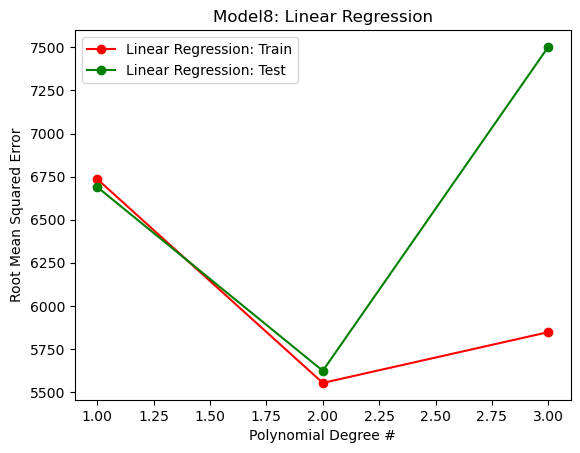

In [150]:
### Linear Regression for different degree of Polynomial Features: Model #8
#Split data between train and test data set
X = model8_df.drop('price', axis = 1)
y = model8_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
rmse_model8_Poly_train = []
rmse_model8_Poly_test = []

#Linear Regression for different degree of Polynomial Features

for i in range(1, 4):
    pipe = Pipeline([('quad_features', PolynomialFeatures(degree = i, include_bias = True)), ('quad_model', LinearRegression())])
    pipe.fit(X_train, y_train)
    preds_train = pipe.predict(X_train)
    preds_test = pipe.predict(X_test)
    rmse_model8_Poly_train.append(np.sqrt(mean_squared_error(y_train, preds_train)))
    rmse_model8_Poly_test.append(np.sqrt(mean_squared_error(y_test, preds_test)))
    

print('RMSE Model#8 Train:', rmse_model8_Poly_train)
print('RMSE Model#8 Test', rmse_model8_Poly_test)

degree = np.linspace(1,3,3)
plt.plot(degree, rmse_model8_Poly_train, marker='o', linestyle='-', color='r', label='Linear Regression: Train')
plt.plot(degree, rmse_model8_Poly_test, marker='o', linestyle='-', color='g', label='Linear Regression: Test')

plt.xlabel('Polynomial Degree #')
plt.ylabel('Root Mean Squared Error')
plt.title('Model8: Linear Regression')
plt.legend()
plt.show()


### Model#9
1. Year
2. Odomoter
3. Transmission: One Hot Encoding
4. Condition: One Hot Encoding
5. Type: One Hot Encoding
6. Manufacturer: One Hot Encoding
7. Fuel: One Hot Encoding
8. State: One Hot Encoding
9. RMSE: 7356

In [152]:
model9_df = vehicle_df[['price', 'odometer', 'year','transmission','condition','type','manufacturer','fuel','state']]
model9_df = model9_df.dropna()
model9_df = model9_df.drop_duplicates()
dummies = pd.get_dummies(model9_df[['condition']])
model9_df = pd.concat([model9_df,dummies],axis=1)
dummies = pd.get_dummies(model9_df[['transmission']])
model9_df = pd.concat([model9_df,dummies],axis=1)
dummies = pd.get_dummies(model9_df[['type']])
model9_df = pd.concat([model9_df,dummies],axis=1)
dummies = pd.get_dummies(model9_df[['manufacturer']])
model9_df = pd.concat([model9_df,dummies],axis=1)
dummies = pd.get_dummies(model9_df[['fuel']])
model9_df = pd.concat([model9_df,dummies],axis=1)
dummies = pd.get_dummies(model9_df[['state']])
model9_df = pd.concat([model9_df,dummies],axis=1)
model9_df = model9_df.drop('transmission',axis=1)
model9_df = model9_df.drop('type',axis=1)
model9_df = model9_df.drop('condition',axis=1)
model9_df = model9_df.drop('manufacturer',axis=1)
model9_df = model9_df.drop('fuel',axis=1)
model9_df = model9_df.drop('state',axis=1)

#Remove outliers from Price data
model9_df = remove_outliers_iqr(model9_df,'price')
#Remove outliers from odometer data
model9_df = model9_df[model9_df['odometer'] < 0.3e7]
model9_df = model9_df[model9_df['odometer'] > 100]
model9_df

price  odometer    year  condition_excellent  condition_fair  \
27      33590   57923.0  2014.0                False           False   
28      22590   71229.0  2010.0                False           False   
29      39590   19160.0  2020.0                False           False   
30      30990   41124.0  2017.0                False           False   
31      15000  128000.0  2013.0                 True           False   
...       ...       ...     ...                  ...             ...   
426875  23590   32226.0  2019.0                False           False   
426876  30590   12029.0  2020.0                False           False   
426877  34990    4174.0  2020.0                False           False   
426878  28990   30112.0  2018.0                False           False   
426879  30590   22716.0  2019.0                False           False   

        condition_good  condition_like new  condition_new  condition_salvage  \
27                True               False          False              False   
28                True               False          False              False   
29                True               False          False              False   
30                True               False          False              False   
31               False               False          False              False   
...                ...                 ...            ...                ...   
426875            True               False          False              False   
426876            True               False          False              False   
426877            True               False          False              False   
426878            True               False          False              False   
426879            True               False          False              False   

        transmission_automatic  ...  state_sd  state_tn  state_tx  state_ut  \
27                       False  ...     False     False     False     False   
28                       False  ...     False     False     False     False   
29                       False  ...     False     False     False     False   
30                       False  ...     False     False     False     False   
31                        True  ...     False     False     False     False   
...                        ...  ...       ...       ...       ...       ...   
426875                   False  ...     False     False     False     False   
426876                   False  ...     False     False     False     False   
426877                   False  ...     False     False     False     False   
426878                   False  ...     False     False     False     False   
426879                   False  ...     False     False     False     False   

        state_va  state_vt  state_wa  state_wi  state_wv  state_wy  
27         False     False     False     False     False     False  
28         False     False     False     False     False     False  
29         False     False     False     False     False     False  
30         False     False     False     False     False     False  
31         False     False     False     False     False     False  
...          ...       ...       ...       ...       ...       ...  
426875     False     False     False     False     False      True  
426876     False     False     False     False     False      True  
426877     False     False     False     False     False      True  
426878     False     False     False     False     False      True  
426879     False     False     False     False     False      True  

[135750 rows x 123 columns]

[7356.543235826087, 5313.186130872294]
[7402.523605288449, 193645.30250435942]


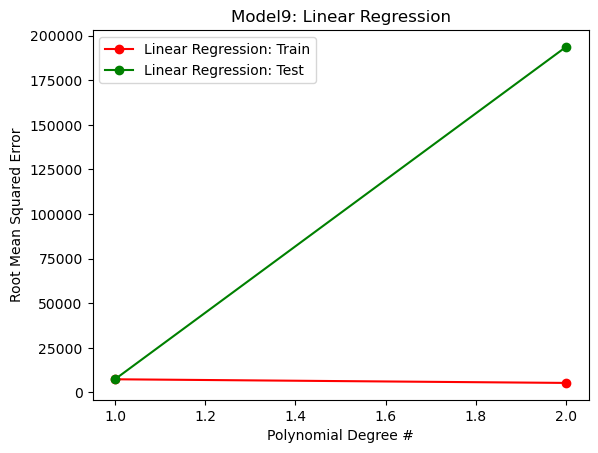

In [153]:
### Linear Regression for different degree of Polynomial Features: Model #9
#Split data between train and test data set
X = model9_df.drop('price', axis = 1)
y = model9_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
rmse_model9_Poly_train = []
rmse_model9_Poly_test = []

#Linear Regression for different degree of Polynomial Features

for i in range(1, 3):
    pipe = Pipeline([('quad_features', PolynomialFeatures(degree = i, include_bias = True)), ('quad_model', LinearRegression())])
    pipe.fit(X_train, y_train)
    preds_train = pipe.predict(X_train)
    preds_test = pipe.predict(X_test)
    rmse_model9_Poly_train.append(np.sqrt(mean_squared_error(y_train, preds_train)))
    rmse_model9_Poly_test.append(np.sqrt(mean_squared_error(y_test, preds_test)))
    

print(rmse_model9_Poly_train)
print(rmse_model9_Poly_test)

degree = np.linspace(1,2,2)
plt.plot(degree, rmse_model9_Poly_train, marker='o', linestyle='-', color='r', label='Linear Regression: Train')
plt.plot(degree, rmse_model9_Poly_test, marker='o', linestyle='-', color='g', label='Linear Regression: Test')

plt.xlabel('Polynomial Degree #')
plt.ylabel('Root Mean Squared Error')
plt.title('Model9: Linear Regression')
plt.legend()
plt.show()

### Model#10
1. Year
2. Odomoter
3. Transmission: One Hot Encoding
4. Condition: One Hot Encoding
5. Type: One Hot Encoding
6. Manufacturer: One Hot Encoding
7. RMSE: 4763

In [155]:
model10_df = vehicle_df[['price', 'odometer', 'year','transmission','condition','type','manufacturer']]
model10_df = model10_df.dropna()
model10_df = model10_df.drop_duplicates()
dummies = pd.get_dummies(model10_df[['condition']])
model10_df = pd.concat([model10_df,dummies],axis=1)
dummies = pd.get_dummies(model10_df[['transmission']])
model10_df = pd.concat([model10_df,dummies],axis=1)
dummies = pd.get_dummies(model10_df[['type']])
model10_df = pd.concat([model10_df,dummies],axis=1)
dummies = pd.get_dummies(model10_df[['manufacturer']])
model10_df = pd.concat([model10_df,dummies],axis=1)

model10_df = model10_df.drop('transmission',axis=1)
model10_df = model10_df.drop('type',axis=1)
model10_df = model10_df.drop('condition',axis=1)
model10_df = model10_df.drop('manufacturer',axis=1)

#Remove outliers from Price data
#model10_df = remove_outliers_iqr(model10_df,'price')
##Set lower bound for price to 4000 USD and upper bound as 40000
model10_df = model10_df[model10_df['price'] < 30000]
model10_df = model10_df[model10_df['price'] > 5000]

#Remove outliers from odometer data
model10_df = model10_df[model10_df['odometer'] < 0.05e7]
model10_df = model10_df[model10_df['odometer'] > 30000]
model10_df

price  odometer    year  condition_excellent  condition_fair  \
28      22590   71229.0  2010.0                False           False   
31      15000  128000.0  2013.0                 True           False   
32      27990   68696.0  2012.0                False           False   
39      24590   40784.0  2017.0                False           False   
45      27990   37332.0  2018.0                False           False   
...       ...       ...     ...                  ...             ...   
426762   7000   80000.0  1982.0                 True           False   
426808  18000  130000.0  2005.0                 True           False   
426809  18000  114400.0  1990.0                False           False   
426831   9800  115000.0  1985.0                False           False   
426833   6800   69550.0  1997.0                False           False   

        condition_good  condition_like new  condition_new  condition_salvage  \
28                True               False          False              False   
31               False               False          False              False   
32                True               False          False              False   
39                True               False          False              False   
45                True               False          False              False   
...                ...                 ...            ...                ...   
426762           False               False          False              False   
426808           False               False          False              False   
426809            True               False          False              False   
426831           False                True          False              False   
426833            True               False          False              False   

        transmission_automatic  ...  manufacturer_pontiac  \
28                       False  ...                 False   
31                        True  ...                 False   
32                       False  ...                 False   
39                       False  ...                 False   
45                       False  ...                 False   
...                        ...  ...                   ...   
426762                    True  ...                 False   
426808                    True  ...                 False   
426809                    True  ...                 False   
426831                    True  ...                 False   
426833                    True  ...                 False   

        manufacturer_porsche  manufacturer_ram  manufacturer_rover  \
28                     False             False               False   
31                     False             False               False   
32                     False             False               False   
39                     False             False               False   
45                     False             False               False   
...                      ...               ...                 ...   
426762                 False             False               False   
426808                 False             False               False   
426809                 False             False               False   
426831                 False             False               False   
426833                 False             False               False   

        manufacturer_saturn  manufacturer_subaru  manufacturer_tesla  \
28                    False                False               False   
31                    False                False               False   
32                    False                False               False   
39                    False                False               False   
45                    False                False               False   
...                     ...                  ...                 ...   
426762                False                False               False   
426808                False     

RMSE Model#10 Train: [4763.212270572758, 3960.7761807017164]
RMSE Model#10 Test [4788.988209749879, 5325.0984754869605]


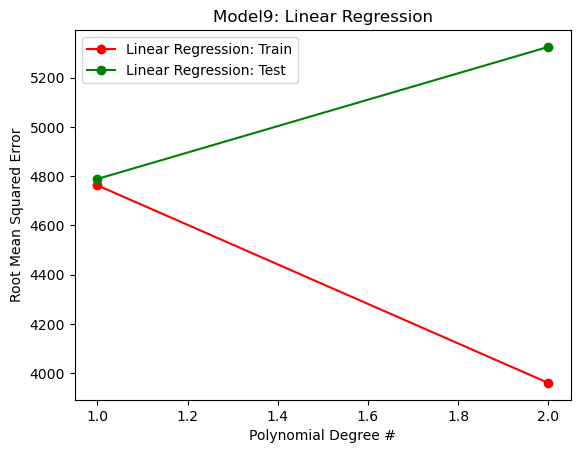

In [156]:
### Linear Regression for different degree of Polynomial Features: Model #10
#Split data between train and test data set
X = model10_df.drop('price', axis = 1)
y = model10_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
rmse_model10_Poly_train = []
rmse_model10_Poly_test = []

#Linear Regression for different degree of Polynomial Features

for i in range(1, 3):
    pipe = Pipeline([('quad_features', PolynomialFeatures(degree = i, include_bias = True)), ('quad_model', LinearRegression())])
    pipe.fit(X_train, y_train)
    preds_train = pipe.predict(X_train)
    preds_test = pipe.predict(X_test)
    rmse_model10_Poly_train.append(np.sqrt(mean_squared_error(y_train, preds_train)))
    rmse_model10_Poly_test.append(np.sqrt(mean_squared_error(y_test, preds_test)))
    

print('RMSE Model#10 Train:', rmse_model10_Poly_train)
print('RMSE Model#10 Test', rmse_model10_Poly_test)

degree = np.linspace(1,2,2)
plt.plot(degree, rmse_model10_Poly_train, marker='o', linestyle='-', color='r', label='Linear Regression: Train')
plt.plot(degree, rmse_model10_Poly_test, marker='o', linestyle='-', color='g', label='Linear Regression: Test')

plt.xlabel('Polynomial Degree #')
plt.ylabel('Root Mean Squared Error')
plt.title('Model9: Linear Regression')
plt.legend()
plt.show()


Ridge Model10: Train RMSE: [4763.212271867298, 4119.324915270285]
Ridge Model10: Test RMSE: [4788.987251057197, 4430.946942587693]


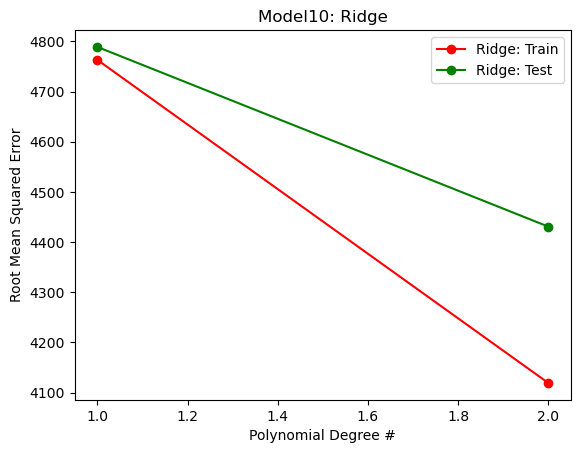

In [278]:
### Ridge Regression for Model10; alpha = 1
#Split data into testing and training data set
X = model10_df.drop('price', axis = 1)
y = model10_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
coef_list_Poly = []
model3_rmse_ridge_Poly_train = []
model3_rmse_ridge_Poly_test = []

#Pipleline for Ridge regression with standard scalar and Polynomial features degree tuning
for i in range(1, 3):
    scaled_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = i, include_bias = True)),
                      ('scaler', StandardScaler()),
                     ('ridge', Ridge())]).fit(X_train, y_train)
    train_preds = scaled_pipe.predict(X_train)
    test_preds = scaled_pipe.predict(X_test)
    model3_rmse_ridge_Poly_train.append(np.sqrt(mean_squared_error(y_train, train_preds)))
    model3_rmse_ridge_Poly_test.append(np.sqrt(mean_squared_error(y_test, test_preds)))
    coef_list_Poly.append(list(scaled_pipe.named_steps['ridge'].coef_))

print("Ridge Model10: Train RMSE:", model3_rmse_ridge_Poly_train)
print("Ridge Model10: Test RMSE:", model3_rmse_ridge_Poly_test)
#print("Coefficients:", coef_list_Poly)

degree = np.linspace(1,2,2)
plt.plot(degree, model3_rmse_ridge_Poly_train, marker='o', linestyle='-', color='r', label='Ridge: Train')
plt.plot(degree, model3_rmse_ridge_Poly_test, marker='o', linestyle='-', color='g', label='Ridge: Test')

plt.xlabel('Polynomial Degree #')
plt.ylabel('Root Mean Squared Error')
plt.title('Model10: Ridge')
plt.legend()
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Based on the RMSE obtained from the different models and the delta between RMSE for the test and train data set, model #10 got the lease RMSE

### Model#10 Output Analysis
1. Year
2. Odomoter
3. Transmission: One Hot Encoding
4. Condition: One Hot Encoding
5. Type: One Hot Encoding
6. Manufacturer: One Hot Encoding
7. RMSE: 4763
8. As odometer value increases car price decreases, as the manufacturing year increases the car value decreases
9. As seen the Partial Dependence Disply and from the coefficients, the year had a stronger impact on the car price compared to odometer reading.
10. Condition of the car affects the car price. Car in condition good and like new got better price than car with condition fair and salvage condition.
11. The effect of transmission was not clear. Since both manual and automatic cars showed decrease in price. The value transmission_other is misleading
12. The effect of type of car and manufacturer is not conclusive.

RMSE Model#10 Train: [4763.212270572758]
RMSE Model#10 Test [4788.988209749879]


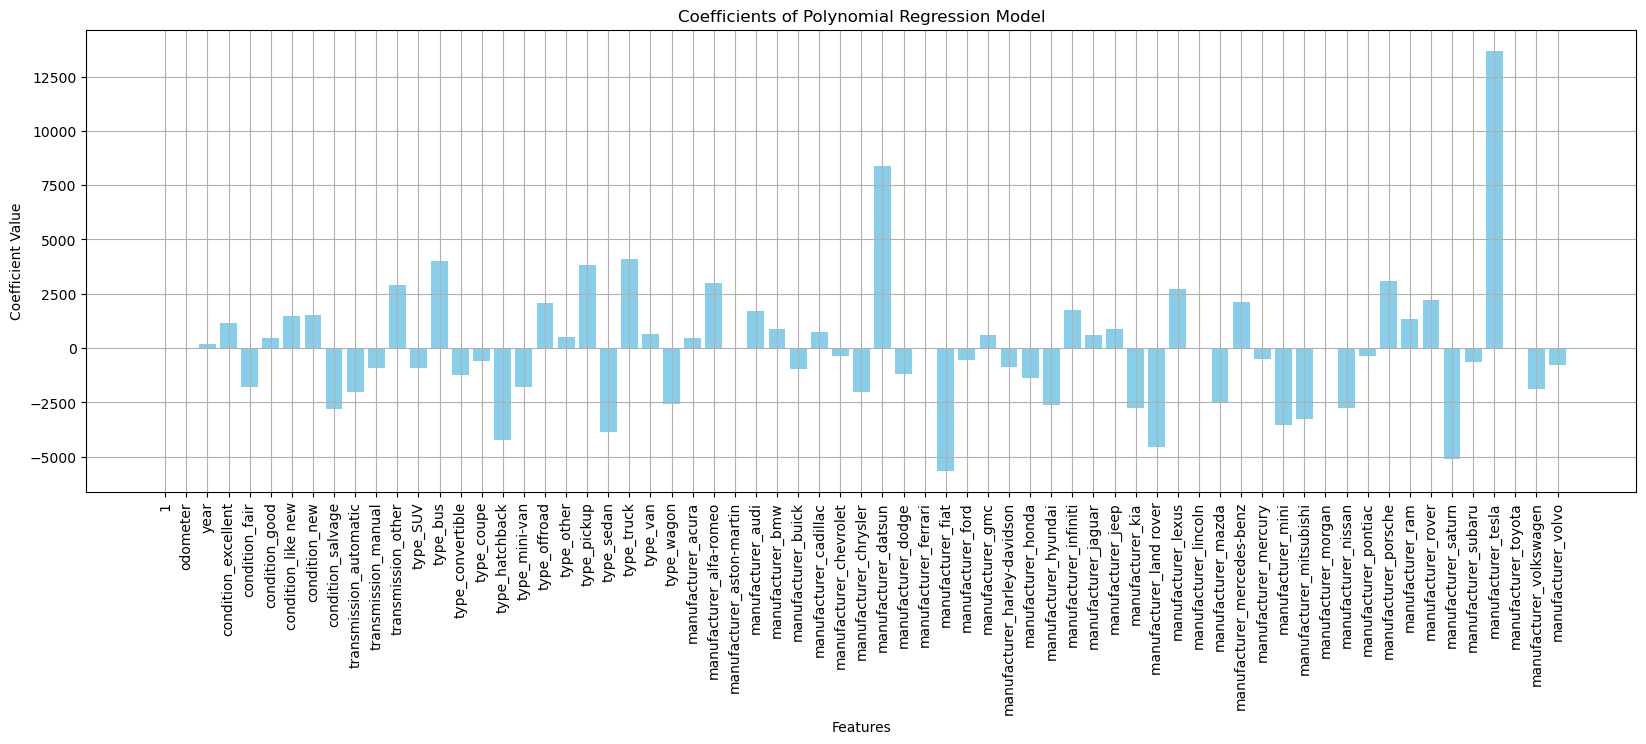

In [160]:
### Linear Regression for different degree of Polynomial Features: Model #10
#Split data between train and test data set
X = model10_df.drop('price', axis = 1)
y = model10_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
rmse_model10_Poly_train = []
rmse_model10_Poly_test = []
coefficients = ''
#Linear Regression for different degree of Polynomial Features

for i in range(1, 2):
    pipe = Pipeline([('quad_features', PolynomialFeatures(degree = i, include_bias = True)), ('quad_model', LinearRegression())])
    pipe.fit(X_train, y_train)
    preds_train = pipe.predict(X_train)
    preds_test = pipe.predict(X_test)
    rmse_model10_Poly_train.append(np.sqrt(mean_squared_error(y_train, preds_train)))
    rmse_model10_Poly_test.append(np.sqrt(mean_squared_error(y_test, preds_test)))
    

print('RMSE Model#10 Train:', rmse_model10_Poly_train)
print('RMSE Model#10 Test', rmse_model10_Poly_test)



# Get the feature names from PolynomialFeatures
poly_features = pipe.named_steps['quad_features']
feature_names = poly_features.get_feature_names_out(input_features=X.columns)
# Get the coefficients from the linear regression model
coefficients = pipe.named_steps['quad_model'].coef_
# Plotting the coefficients
plt.figure(figsize=(20, 6))
plt.bar(feature_names, coefficients, color='skyblue')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.title('Coefficients of Polynomial Regression Model')
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Partial Dependence Plots for Features: "year" and "odometer"')

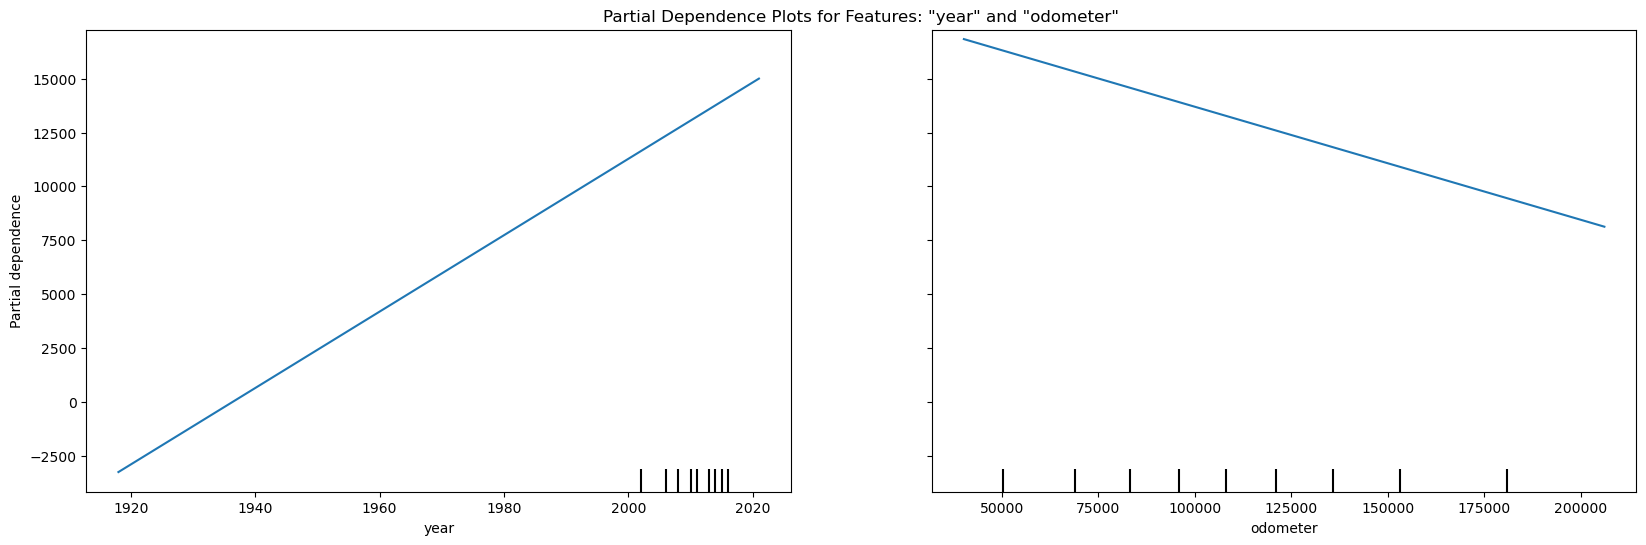

In [161]:
fig, ax = plt.subplots(figsize = (20, 6))
#PartialDependenceDisplay.from_estimator(pipe, X, features = ['year', 'odometer', 'transmission', 'condition', 'type', 'manufacturer'], ax = ax)
PartialDependenceDisplay.from_estimator(pipe, X, features = ['year', 'odometer'], ax = ax)

ax.set_title('Partial Dependence Plots for Features: "year" and "odometer"')


Text(0.5, 1.0, 'Partial Dependence Plots for Features: Condition')

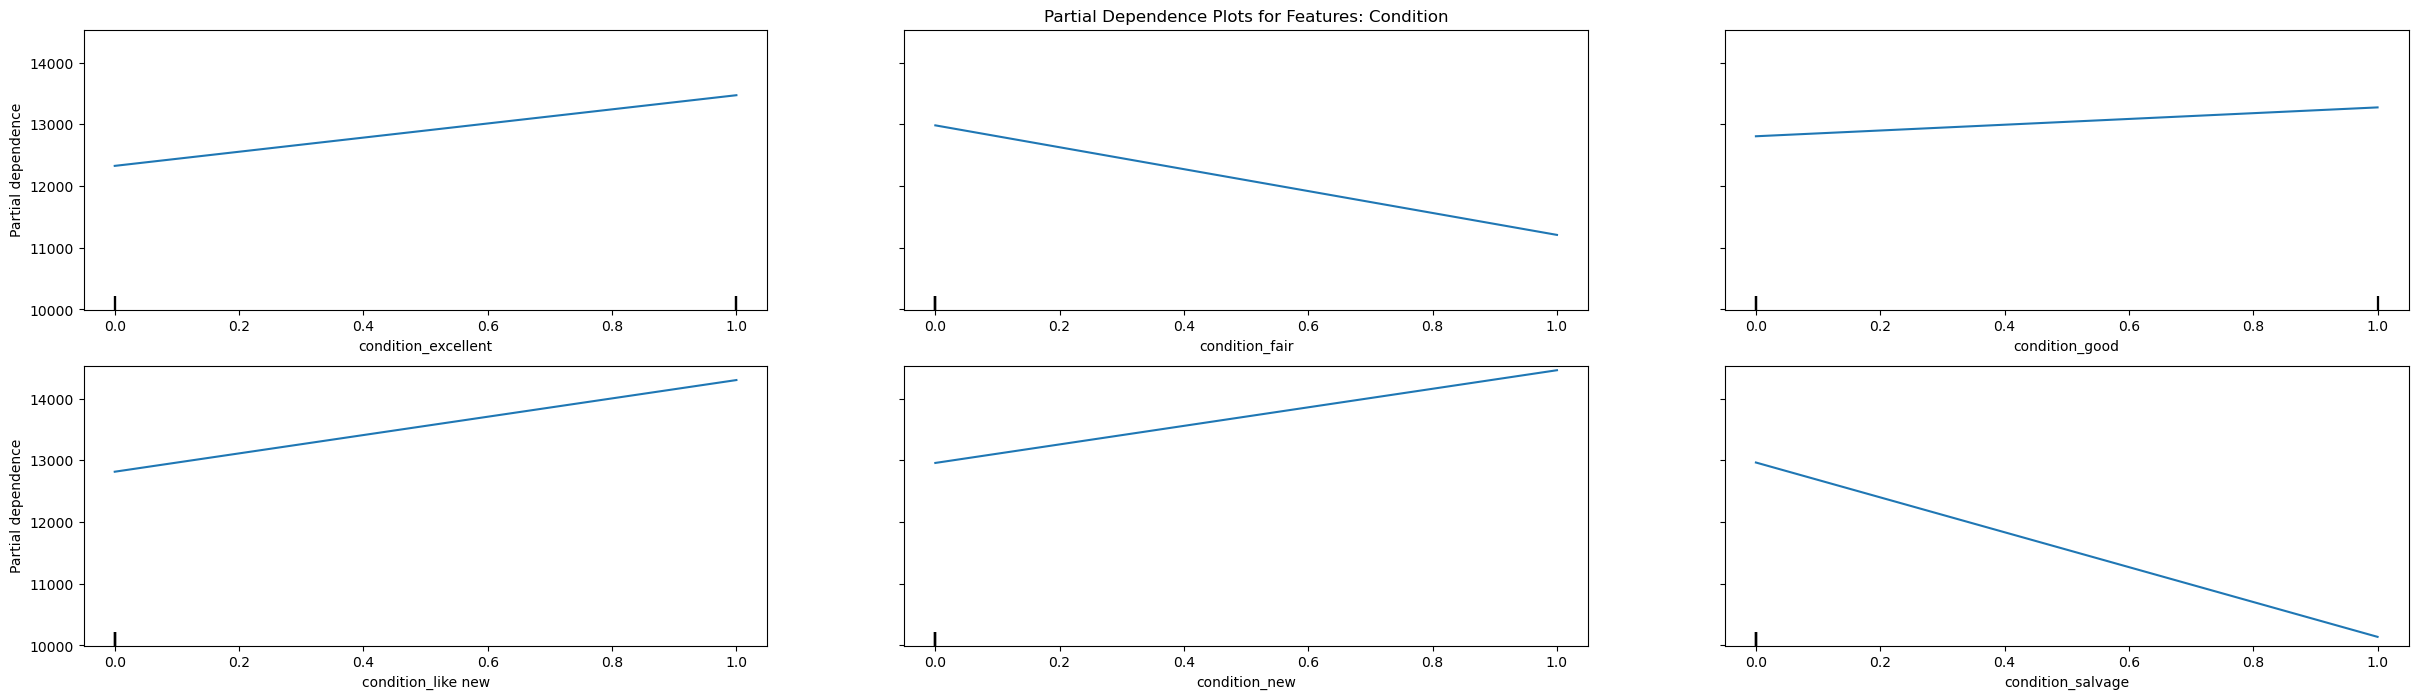

In [162]:
fig, ax = plt.subplots(figsize = (30, 8))
PartialDependenceDisplay.from_estimator(pipe, X, features = ['condition_excellent', 'condition_fair','condition_good','condition_like new','condition_new','condition_salvage'], ax = ax)

ax.set_title('Partial Dependence Plots for Features: Condition')


Text(0.5, 1.0, 'Partial Dependence Plots for Features: Transmission')

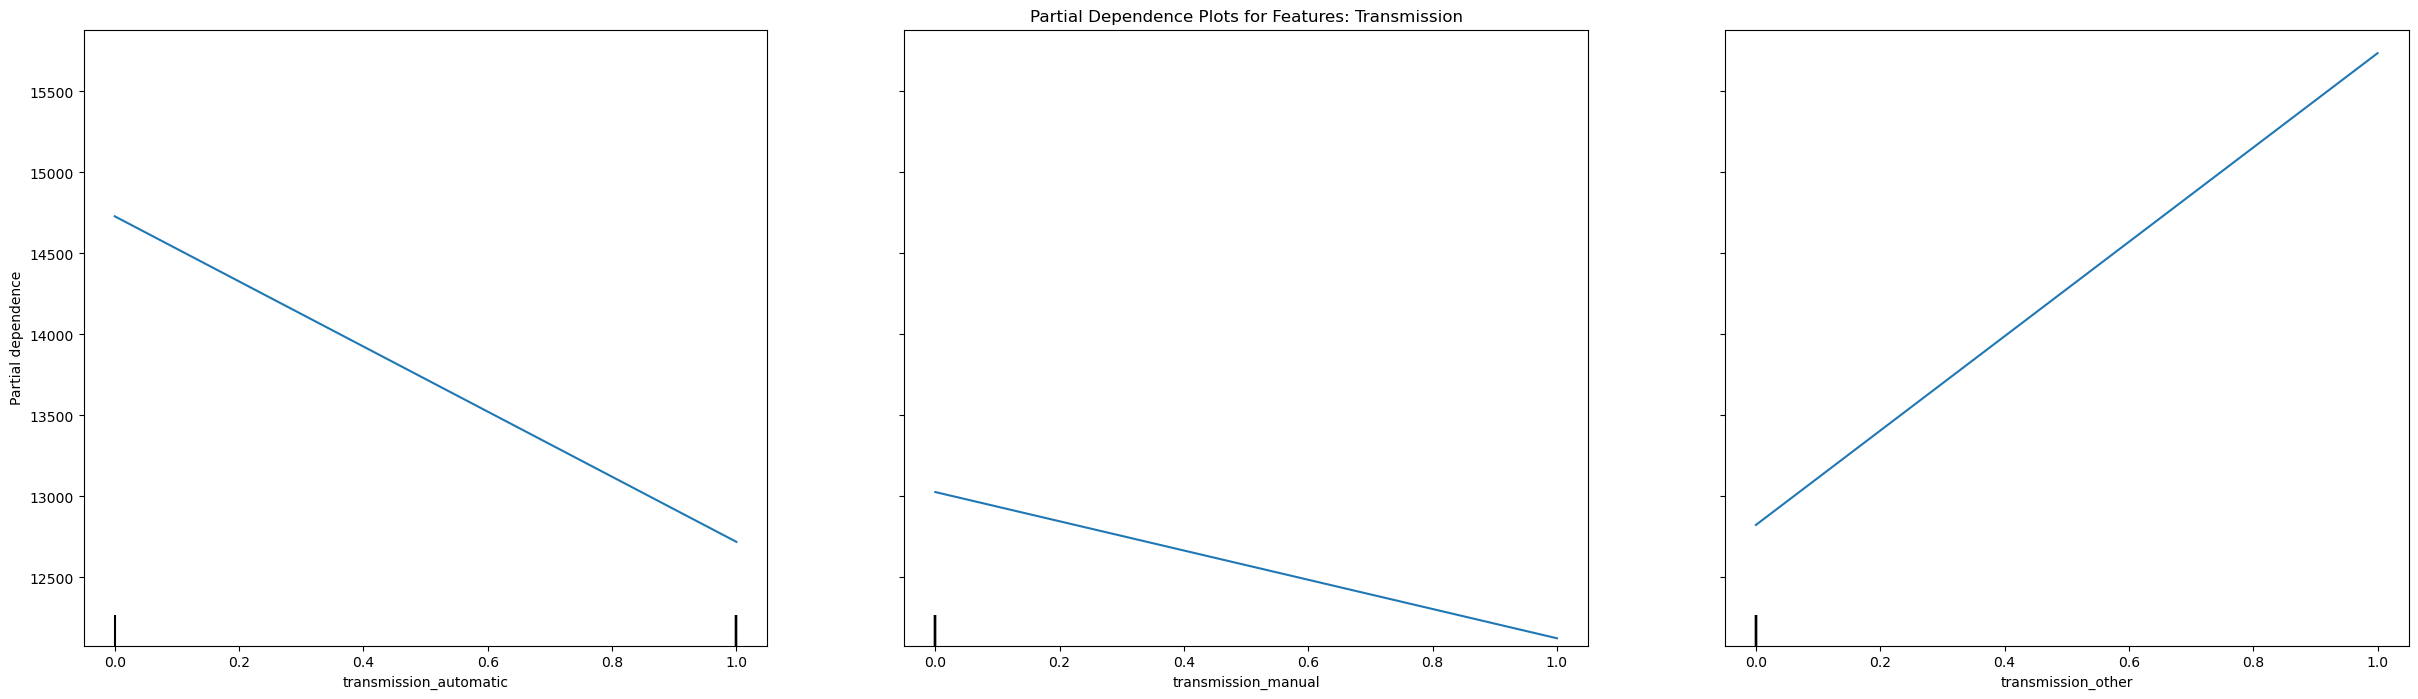

In [163]:
fig, ax = plt.subplots(figsize = (30, 8))
PartialDependenceDisplay.from_estimator(pipe, X, features = ['transmission_automatic', 'transmission_manual','transmission_other'], ax = ax)

ax.set_title('Partial Dependence Plots for Features: Transmission')


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

### Conclusion

- From the above models, the best model #10 had RMSE ~4763 USD. The median price of the car is ~12000 USD.
- This model is not good enough to predict the price of the car with high accuracy.
- There is corelation between car price and year of manufacturing, odometer and condition of the car
- As odometer value increases car price decreases, as the manufacturing year increases the car value decreases
- The year had a stronger impact on the car price compared to odometer reading. Stocking newer cars ir recommended
- Condition of the car affects the car price. Car in condition good and like new got better price than car with condition fair and salvage condition.
- The dealers should focus on these factors when they stock the cars in the inventory

### Next Steps
- Use advanced models
- Include sales profit margin information to make appropriate recommendations to the car dealer